In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [63]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [64]:
df = pd.read_csv(r"D:\6th sem\Projects\SAADAA\SAADAA_assessment_data - Sheet1.csv")
df.head()

customer_id  customer_tenure customer_location customer_type   order_id  \
0   CUST00001               39             Delhi     Returning  ORD000001   
1   CUST00002               52         Hyderabad     Returning  ORD000002   
2   CUST00003               29              Pune     Returning  ORD000003   
3   CUST00004               15            Jaipur     Returning  ORD000004   
4   CUST00005               43              Pune     Returning  ORD000005   

  order_date  order_value payment_method  order_frequency  discount_applied  \
0    04:51.9      4015.21    Net Banking                9                 5   
1    39:38.4      2205.61    Credit Card                3                15   
2    15:18.9       858.84    Net Banking                8                30   
3    52:58.4       500.00            UPI                1                 0   
4    17:39.5      1843.50         Wallet                9                40   

  return_status product_category product_sku size inventory_status  \
0            No          Jackets     SKU0001  XXL         In Stock   
1            No         T-Shirts     SKU0002    S     Out of Stock   
2            No         T-Shirts     SKU0003    L         In Stock   
3            No         T-Shirts     SKU0004  XXL         In Stock   
4           Yes      Sweatshirts     SKU0005    L         In Stock   

            source  engagement_score  
0    Word of Mouth                36  
1       Google Ads                37  
2  Email Marketing                95  
3    Word of Mouth                10  
4    Word of Mouth                 0

In [65]:
df.tail()

customer_id  customer_tenure customer_location customer_type   order_id  \
995   CUST00996                4            Mumbai           New  ORD000996   
996   CUST00997                1           Chennai           New  ORD000997   
997   CUST00998               49             Delhi     Returning  ORD000998   
998   CUST00999               40            Mumbai     Returning  ORD000999   
999   CUST01000               32            Jaipur     Returning  ORD001000   

    order_date  order_value payment_method  order_frequency  discount_applied  \
995    10:16.2      4043.83         Wallet                5                15   
996    43:03.8      3531.79    Credit Card                2                 0   
997    38:22.7      3129.50    Net Banking                4                20   
998    54:46.5      1934.51    Net Banking                2                20   
999    47:12.4      3363.67         Wallet                2                20   

    return_status product_category product_sku size inventory_status  \
995           Yes           Shirts     SKU0996  XXL         In Stock   
996            No         T-Shirts     SKU0997    S         In Stock   
997           Yes          Jackets     SKU0998   XL         In Stock   
998            No           Shirts     SKU0999  XXL         In Stock   
999            No          Jackets     SKU1000   XL         In Stock   

            source  engagement_score  
995     Google Ads                38  
996   Facebook Ads                44  
997      Instagram                77  
998  Word of Mouth                80  
999   Facebook Ads                11

In [66]:
df.columns

Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_date', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status',
       'product_category', 'product_sku', 'size', 'inventory_status', 'source',
       'engagement_score'],
      dtype='object')

In [67]:
df.shape

(1000, 17)

### Column Types

#### Numerical Columns:
- `customer_tenure`
- `order_value`
- `order_frequency`
- `discount_applied`
- `engagement_score`

#### Categorical Columns:
- `customer_id`
- `customer_location`
- `customer_type`
- `order_id`
- `order_date`
- `payment_method`
- `return_status`
- `product_category`
- `product_sku`
- `size`
- `inventory_status`
- `source`


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   object 
 1   customer_tenure    1000 non-null   int64  
 2   customer_location  1000 non-null   object 
 3   customer_type      1000 non-null   object 
 4   order_id           1000 non-null   object 
 5   order_date         1000 non-null   object 
 6   order_value        1000 non-null   float64
 7   payment_method     1000 non-null   object 
 8   order_frequency    1000 non-null   int64  
 9   discount_applied   1000 non-null   int64  
 10  return_status      1000 non-null   object 
 11  product_category   1000 non-null   object 
 12  product_sku        1000 non-null   object 
 13  size               1000 non-null   object 
 14  inventory_status   1000 non-null   object 
 15  source             1000 non-null   object 
 16  engagement_score   1000 n

`Note : The dataset is complete, with no missing values across any columns. 
This ensures data integrity and reliability for analysis without the need for imputation or handling null values.`

In [69]:
df.nunique()

customer_id          1000
customer_tenure        60
customer_location       8
customer_type           2
order_id             1000
order_date            333
order_value           913
payment_method          5
order_frequency         9
discount_applied        9
return_status           2
product_category        6
product_sku          1000
size                    5
inventory_status        2
source                  5
engagement_score      101
dtype: int64

In [70]:
sorted(df['discount_applied'].unique())

[0, 5, 10, 15, 20, 25, 30, 40, 50]

In [71]:
sorted(df['order_frequency'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [72]:
sorted(df['engagement_score'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [73]:
df['order_date'].value_counts()

order_date
00:00.0    4
04:51.9    3
45:45.9    3
21:04.9    3
18:01.1    3
49:43.8    3
22:53.0    3
38:33.5    3
29:00.5    3
42:09.7    3
52:04.3    3
08:06.5    3
05:56.8    3
25:45.9    3
13:09.2    3
43:47.0    3
07:34.1    3
53:20.0    3
01:58.9    3
47:23.2    3
37:07.0    3
13:52.4    3
07:44.9    3
20:54.1    3
57:50.3    3
04:30.3    3
43:36.2    3
55:29.7    3
40:21.6    3
36:23.8    3
34:03.2    3
30:59.5    3
07:55.7    3
21:26.5    3
28:06.5    3
42:20.5    3
27:34.1    3
56:34.6    3
55:51.4    3
50:27.0    3
50:37.8    3
24:19.5    3
13:20.0    3
51:42.7    3
49:11.4    3
19:05.9    3
45:56.8    3
48:38.9    3
16:45.4    3
22:09.7    3
21:48.1    3
31:31.9    3
35:08.1    3
01:37.3    3
47:44.9    3
42:53.0    3
18:11.9    3
00:54.1    3
05:35.1    3
34:14.1    3
20:21.6    3
12:04.3    3
27:12.4    3
40:00.0    3
49:22.2    3
38:22.7    3
45:24.3    3
00:21.6    3
49:54.6    3
59:49.2    3
29:22.2    3
12:15.1    3
16:13.0    3
17:17.8    3
52:15.1    3
09:33.0    3
3

In [173]:
df = df.drop(columns=['order_date'])
# Since we have only the time in the format of the MM:ss.millisecond 

In [174]:
df.head()

customer_id  customer_tenure  customer_location  customer_type  order_id  \
0            0               39                  2              1         0   
1            1               52                  3              1         1   
2            2               29                  7              1         2   
3            3               15                  4              1         3   
4            4               43                  7              1         4   

   order_value  payment_method  order_frequency  discount_applied  \
0      4015.21               2                9                 5   
1      2205.61               1                3                15   
2       858.84               2                8                30   
3       500.00               3                1                 0   
4      1843.50               4                9                40   

   return_status  product_category  product_sku  size  inventory_status  \
0              0                 1            0     4                 0   
1              0                 5            1     2                 1   
2              0                 5            2     0                 0   
3              0                 5            3     4                 0   
4              1                 4            4     0                 0   

   source  engagement_score      CLV  CLV_Segment  order_value_bin  \
0       4                36  4015.21            2                3   
1       2                37  2205.61            1                3   
2       0                95   858.84            0                1   
3       4                10   500.00            0                0   
4       4                 0  1843.50            1                2   

   source_numeric  
0               4  
1               2  
2               0  
3               4  
4               4

In [175]:
# shape
df.shape

(1000, 20)

In [176]:
df.duplicated().sum()

0

In [177]:
df.isnull().sum()

customer_id          0
customer_tenure      0
customer_location    0
customer_type        0
order_id             0
order_value          0
payment_method       0
order_frequency      0
discount_applied     0
return_status        0
product_category     0
product_sku          0
size                 0
inventory_status     0
source               0
engagement_score     0
CLV                  0
CLV_Segment          0
order_value_bin      0
source_numeric       0
dtype: int64

In [178]:
df.describe()  

customer_id  customer_tenure  customer_location  customer_type  \
count  1000.000000      1000.000000        1000.000000    1000.000000   
mean    499.500000        31.200000           3.542000       0.810000   
std     288.819436        17.372905           2.343444       0.392497   
min       0.000000         1.000000           0.000000       0.000000   
25%     249.750000        17.000000           1.000000       1.000000   
50%     499.500000        32.000000           4.000000       1.000000   
75%     749.250000        47.000000           6.000000       1.000000   
max     999.000000        60.000000           7.000000       1.000000   

          order_id  order_value  payment_method  order_frequency  \
count  1000.000000  1000.000000     1000.000000      1000.000000   
mean    499.500000  2600.555060        1.952000         5.032000   
std     288.819436  1394.337968        1.421167         2.551762   
min       0.000000   500.000000        0.000000         1.000000   
25%     249.750000  1565.915000        1.000000         3.000000   
50%     499.500000  2541.280000        2.000000         5.000000   
75%     749.250000  3541.415000        3.000000         7.000000   
max     999.000000  7251.060000        4.000000         9.000000   

       discount_applied  return_status  product_category  product_sku  \
count        1000.00000    1000.000000       1000.000000  1000.000000   
mean           14.72000       0.204000          2.465000   499.500000   
std            14.22758       0.403171          1.705193   288.819436   
min             0.00000       0.000000          0.000000     0.000000   
25%             0.00000       0.000000          1.000000   249.750000   
50%            15.00000       0.000000          2.000000   499.500000   
75%            25.00000       0.000000          4.000000   749.250000   
max            50.00000       1.000000          5.000000   999.000000   

              size  inventory_status       source  engagement_score  \
count  1000.000000        1000.00000  1000.000000       1000.000000   
mean      2.013000           0.10100     1.910000         50.435000   
std       1.385912           0.30148     1.426862         28.985582   
min       0.000000           0.00000     0.000000          0.000000   
25%       1.000000           0.00000     1.000000         26.000000   
50%       2.000000           0.00000     2.000000         51.000000   
75%       3.000000           0.00000     3.000000         76.000000   
max       4.000000           1.00000     4.000000        100.000000   

               CLV  CLV_Segment  order_value_bin  source_numeric  
count  1000.000000  1000.000000      1000.000000     1000.000000  
mean   2600.555060     1.001000         2.450000        1.910000  
std    1394.337968     0.708167         1.005242        1.426862  
min     500.000000     0.000000         0.000000        0.000000  
25%    1565.915000     0.750000         2.000000        1.000000  
50%    2541.280000     1.000000         3.000000        2.000000  
75%    3541.415000     2.000000         3.000000        3.000000  
max    7251.060000     2.000000         4.000000        4.000000

# **Customer Data Insights Report** 🧑‍💼📊

---

## **1. Customer Tenure Insights** ⏳

### **Observation:**
- **Average Customer Tenure**: The average customer tenure is **31.2 months** (~2.6 years), suggesting that most customers have been with the company for a significant period, but there's potential to attract more long-term customers. 📊
- **Minimum Tenure**: The shortest recorded tenure is **1 month**, indicating that some customers may be new or could be at risk of churning. 🆕
- **Maximum Tenure**: The longest tenure recorded is **60 months** (~5 years), showing that there are long-term, loyal customers. 🕰️
- **25th Percentile (25%)**: **17 months** or fewer. A quarter of customers have a relatively short tenure, which may indicate early drop-offs or new customers. ⏱️
- **50th Percentile (Median)**: **32 months**, meaning half of the customer base has been with the company for more than 2.5 years. This suggests a fairly loyal customer base. 📉
- **75th Percentile (75%)**: **47 months** or fewer, showing that a significant portion of customers has been with the company for nearly 4 years. 📈
- **Standard Deviation**: **17.37 months**, which indicates a fair amount of variation in customer tenure, from new customers to long-term clients. 📊

---

### **Actionable Insights:**
- **Loyalty Program Focus**: Consider targeting customers with **over 3 years of tenure** for special loyalty programs to strengthen their engagement and prevent churn. 🎁
- **Retention Strategy**: Customers with **less than 6 months tenure** could be at risk of churning. Offer them **discounts or exclusive deals** to increase retention. 🔄
- **Segmented Marketing**: Use this tenure distribution to create targeted campaigns, like **new customer promotions** or **anniversary offers** for long-term clients. 🎯

---

## **2. Order Value Insights** 💰

### **Observation:**
- **Average Order Value**: The average order value is ₹**2600.56**, suggesting moderate spending per customer per transaction. 💵
- **Minimum Order Value**: The lowest order value is **₹500**, which may indicate small or impulse purchases. 🛒
- **Maximum Order Value**: The highest order value is **₹7251**, showing that some customers make large, premium purchases. 💸
- **25th Percentile (25%)**: **₹1565.92** or less. A quarter of customers spend less than this amount, indicating a lower spending segment. 💳
- **50th Percentile (Median)**: **₹2541.28**, indicating that half of the customers tend to spend between ₹1500 and ₹2500 per order. 💰
- **75th Percentile (75%)**: **₹3541.42** or more. A significant portion of customers spends more than this amount per order. 💸
- **Standard Deviation**: **₹1394.34**, showing a significant variation in spending, suggesting a mix of high and low-value customers. 📊

---

### **Actionable Insights:**
- **Upsell and Cross-Sell**: Focus on **high-value customers** with **premium products** and **bundle deals** to maximize order value. 🛍️
- **Target Impulse Buyers**: Promote **add-on items** or **discounted bundles** for customers with smaller purchases to increase the average order value. 🎯
- **Seasonal Offers**: Introduce **seasonal discounts** or **flash sales** to encourage customers to make larger purchases. 🎉

---

## **3. Order Frequency Insights** 🔁

### **Observation:**
- **Average Order Frequency**: Customers place an average of **5.03 orders**. This suggests that most customers make multiple purchases, but there's room to increase repeat business. 🔄
- **Minimum Order Frequency**: The lowest recorded order frequency is **1**, indicating a segment of customers who make only a single purchase. 🛍️
- **Maximum Order Frequency**: The highest recorded order frequency is **9**, representing highly engaged customers. 📅
- **25th Percentile (25%)**: **3 orders** or fewer. A quarter of customers make less than 3 orders, indicating a potential for re-engagement. 🔄
- **50th Percentile (50%)**: **5 orders**, which suggests that half of customers make around 5 purchases over time. 🔁
- **75th Percentile (75%)**: **7 orders** or more, indicating that a significant portion of customers are repeat buyers. 📈
- **Standard Deviation**: **2.55 orders**, indicating that most customers are somewhat consistent in their purchase behavior, though there's variability. 📊

---

### **Actionable Insights:**
- **Reward Repeat Buyers**: Implement a **loyalty program** to reward customers who place frequent orders (5+), offering them special discounts or early access to products. 🎁
- **Re-engagement Campaigns**: Target customers who have made **1 or 2 orders** with **re-engagement campaigns** and personalized offers to increase their order frequency. 📨
- **Predictive Analytics**: Use customer order frequency data to predict future behavior and develop **customized offers** for each customer. 🔮

---

## **4. Discount Applied Insights** 🎫

### **Observation:**
- **Average Discount Applied**: The average discount is **14.72%**, showing that most customers receive moderate discounts. 💸
- **Minimum Discount**: The lowest discount is **0%**, suggesting that some customers are purchasing without any promotions. 🛍️
- **Maximum Discount**: The highest discount is **50%**, showing that some customers benefit from significant price reductions, possibly due to special promotions or loyalty programs. 🔥
- **25th Percentile (25%)**: **0% discount**. A quarter of customers don’t receive discounts at all, possibly due to full-price purchases. 💰
- **50th Percentile (50%)**: **15% discount**, showing that half of the customer base enjoys some level of discount, with the median discount being around 15%. 🏷️
- **75th Percentile (75%)**: **25% discount** or higher, indicating that a significant portion of customers enjoys a substantial discount. 🎁
- **Standard Deviation**: **14.23%**, suggesting considerable variation in the discounts applied to customers. 📊

---

### **Actionable Insights:**
- **Targeted Discounts**: Offer **personalized discounts** for long-tenure customers to boost loyalty, while using **seasonal promotions** to encourage new purchases. 🎯
- **Bulk Discounts**: Offer **bulk purchase discounts** to encourage customers to spend more and buy in larger quantities. 🛍️
- **Exclusive Deals**: Create **exclusive discount offers** for high-engagement customers to increase their spending. 💝

---

## **5. Engagement Score Insights** 💬

### **Observation:**
- **Average Engagement Score**: The average engagement score is **50.44/100**, which suggests that customers engage with the brand moderately. 📱
- **Minimum Engagement Score**: Some customers have an engagement score of **0**, indicating very little or no interaction with the brand. ⚠️
- **Maximum Engagement Score**: The highest engagement score is **100**, showing highly engaged customers who interact frequently with the brand. 🏅
- **25th Percentile (25%)**: **26** or fewer. A quarter of customers have low engagement with the brand, which may indicate disengagement or lack of interest. ⚡
- **50th Percentile (50%)**: **51**, showing that half of the customers have moderate engagement with the company. 🔄
- **75th Percentile (75%)**: **76** or higher, indicating a healthy portion of customers who actively engage with the brand. 📈
- **Standard Deviation**: **28.99**, indicating a wide range of engagement levels, from passive to highly engaged customers. 📊

---

### **Actionable Insights:**
- **Re-engagement Strategy**: Focus on customers with low engagement (score < 25) through **targeted re-engagement campaigns**, offering incentives to increase their interaction. 🔄
- **Loyalty for Engaged Customers**: Reward customers with high engagement (score > 75) with **exclusive offers** or early access to new products to keep them engaged. 💎
- **Engagement Campaigns**: For those with moderate engagement, create **personalized content** and **offers** to boost interaction. 📱

---

# **Key Summary 🚀**

- **Loyalty Programs**: Target **long-tenure** and **high-engagement** customers with **exclusive rewards**. 🎁
- **Increase Customer Spending**: Use **upselling**, **bundling**, and **personalized promotions** to increase the average **order value** and **frequency**. 💰
- **Discount Optimization**: Tailor discounts based on **customer behavior** to maximize their impact and avoid unnecessary price reductions. 🏷️
- **Re-engage Inactive Customers**: Implement **re-engagement strategies** for customers with low tenure, low frequency, and low engagement. 🔄

---

### **Final Thought 💡**  
By applying these **insights and strategies**, we can enhance customer experience, increase sales, and build **long-term loyalty**, ultimately driving **sustainable business growth**. 📊


In [179]:
df.sample(5)

customer_id  customer_tenure  customer_location  customer_type  order_id  \
174          174               27                  7              1       174   
785          785               11                  2              0       785   
626          626               23                  4              1       626   
641          641               56                  5              1       641   
967          967               21                  2              1       967   

     order_value  payment_method  order_frequency  discount_applied  \
174      4397.80               1                1                 5   
785      4178.89               2                5                25   
626      3058.74               2                3                25   
641      1756.45               4                4                 0   
967      6045.58               0                9                20   

     return_status  product_category  product_sku  size  inventory_status  \
174              0                 2          174     3                 0   
785              0                 0          785     0                 0   
626              0                 1          626     3                 0   
641              0                 4          641     4                 0   
967              0                 4          967     3                 0   

     source  engagement_score      CLV  CLV_Segment  order_value_bin  \
174       3                15  4397.80            2                3   
785       1                93  4178.89            2                3   
626       2                39  3058.74            1                3   
641       4                 9  1756.45            1                2   
967       2                76  6045.58            2                4   

     source_numeric  
174               3  
785               1  
626               2  
641               4  
967               2

# Univariate Analysis on Numerical columns

- `customer_tenure`
- `order_value`
- `order_frequency`
- `discount_applied`
- `engagement_score`

In [180]:
df.head()

customer_id  customer_tenure  customer_location  customer_type  order_id  \
0            0               39                  2              1         0   
1            1               52                  3              1         1   
2            2               29                  7              1         2   
3            3               15                  4              1         3   
4            4               43                  7              1         4   

   order_value  payment_method  order_frequency  discount_applied  \
0      4015.21               2                9                 5   
1      2205.61               1                3                15   
2       858.84               2                8                30   
3       500.00               3                1                 0   
4      1843.50               4                9                40   

   return_status  product_category  product_sku  size  inventory_status  \
0              0                 1            0     4                 0   
1              0                 5            1     2                 1   
2              0                 5            2     0                 0   
3              0                 5            3     4                 0   
4              1                 4            4     0                 0   

   source  engagement_score      CLV  CLV_Segment  order_value_bin  \
0       4                36  4015.21            2                3   
1       2                37  2205.61            1                3   
2       0                95   858.84            0                1   
3       4                10   500.00            0                0   
4       4                 0  1843.50            1                2   

   source_numeric  
0               4  
1               2  
2               0  
3               4  
4               4

## Customer Tenure

In [181]:
df['customer_tenure'].unique()

array([39, 52, 29, 15, 43,  8, 21, 58, 19, 23, 11, 24, 53, 36, 40,  3, 22,
        2, 44, 30, 38, 60, 33, 12, 25, 49, 27, 59, 42, 28, 16, 47, 51, 55,
       57, 37,  7,  9, 18,  4, 14, 50, 26, 20, 35, 17,  6, 54, 34, 10, 31,
       48, 45, 41,  1,  5, 13, 32, 56, 46], dtype=int64)

In [182]:
df['customer_tenure'].describe()

count    1000.000000
mean       31.200000
std        17.372905
min         1.000000
25%        17.000000
50%        32.000000
75%        47.000000
max        60.000000
Name: customer_tenure, dtype: float64

<Axes: ylabel='Density'>

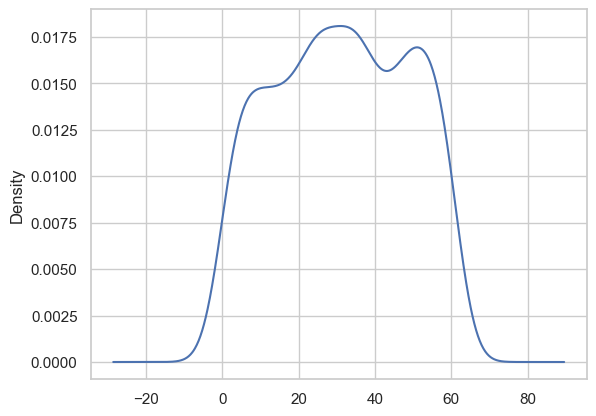

In [183]:
df['customer_tenure'].plot(kind = 'kde')

## Order Value

In [184]:
# Summary statistics for the order_value column
order_value_summary = df['order_value'].describe()
print(order_value_summary)

count    1000.000000
mean     2600.555060
std      1394.337968
min       500.000000
25%      1565.915000
50%      2541.280000
75%      3541.415000
max      7251.060000
Name: order_value, dtype: float64


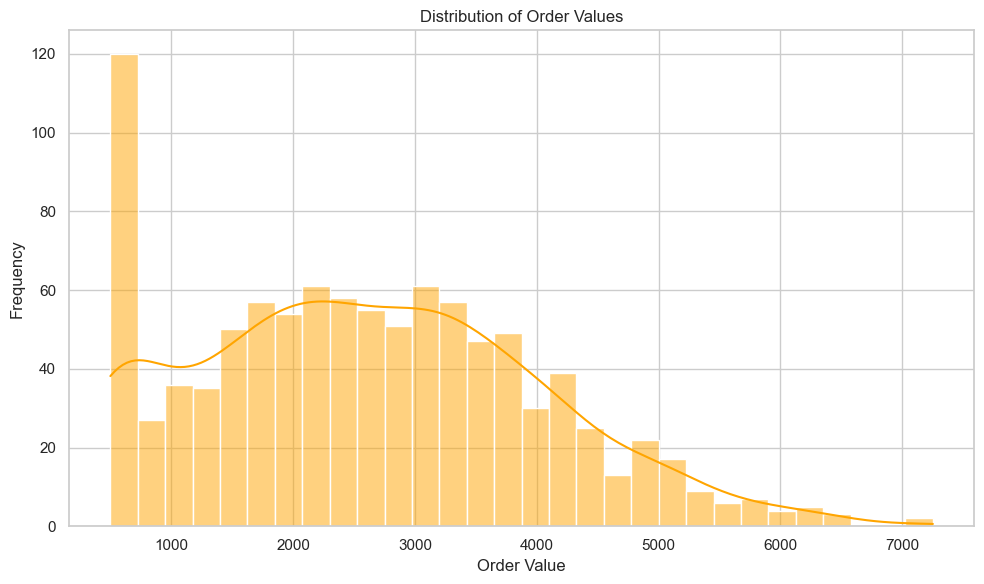

In [185]:
# Plotting histogram to visualize the distribution of order_value
plt.figure(figsize=(10, 6))
sns.histplot(df['order_value'], bins=30, kde=True, color='orange')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Axes: >

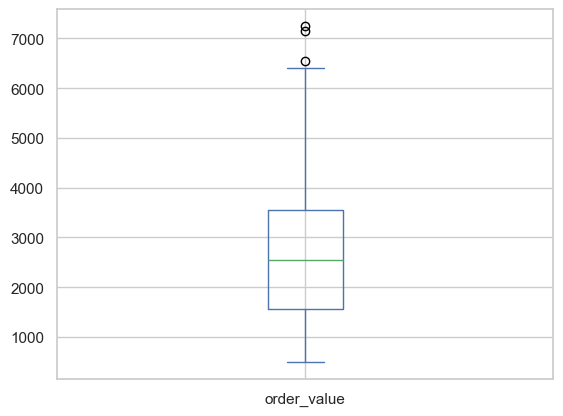

In [186]:
df['order_value'].plot(kind='box')

In [187]:
# Some of the customers shows the order value more thean 6000

In [188]:
# Check skewness and kurtosis
skewness = df['order_value'].skew()
kurtosis = df['order_value'].kurtosis()

print(f"Skewness of Order Value: {skewness}")
print(f"Kurtosis of Order Value: {kurtosis}")

Skewness of Order Value: 0.3560861032476657
Kurtosis of Order Value: -0.3832488271968475


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\3651012867.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['order_value'], shade=True, color='green')


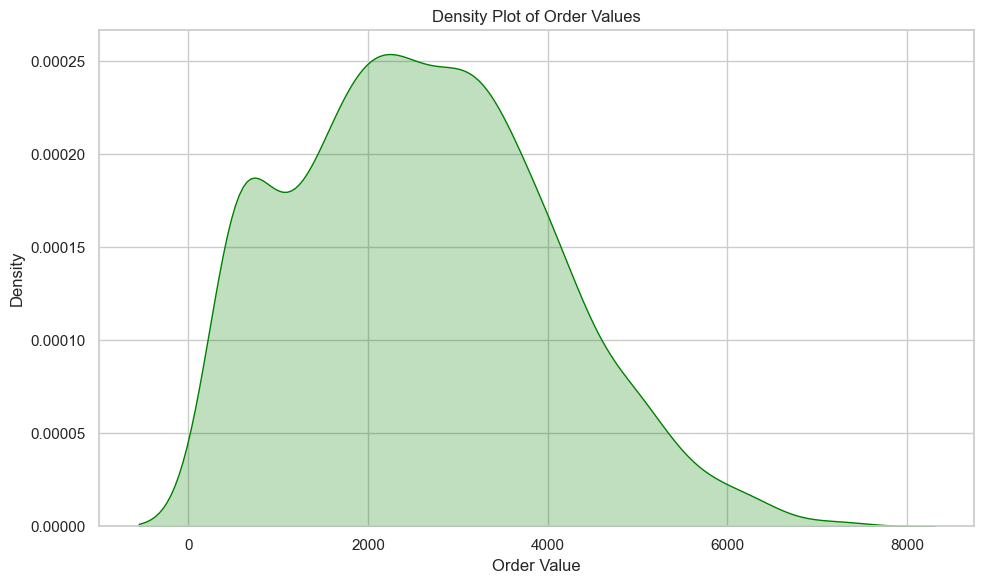

In [189]:
# Density plot to visualize the distribution of order_value
plt.figure(figsize=(10, 6))
sns.kdeplot(df['order_value'], shade=True, color='green')
plt.title('Density Plot of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [190]:
# Calculate Q1 (25th percentile), Q3 (75th percentile) and IQR
Q1 = df['order_value'].quantile(0.25)
Q3 = df['order_value'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['order_value'] < lower_bound) | (df['order_value'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 3


# Order Value Analysis Insights

## Key Statistics:
- **Count**: 1000 Orders
- **Mean**: 2600.56
- **Standard Deviation**: 1394.34
- **Minimum Value**: 500
- **Maximum Value**: 7251.06
- **25th Percentile (Q1)**: 1565.92
- **Median (50th Percentile)**: 2541.28
- **75th Percentile (Q3)**: 3541.42

## Distribution Characteristics:
- **Skewness**: 0.356 (Right-Skewed Distribution)
  - Indicates a majority of smaller order values with some large orders pulling the mean higher.
- **Kurtosis**: -0.383 (Platykurtic Distribution)
  - Suggests fewer extreme outliers compared to a normal distribution, with a flatter distribution.
  
## Insights:
1. **Right Skew**: The majority of orders are on the lower end of the value range, but some larger orders increase the average order value.
2. **Spread of Data**: The relatively high standard deviation (1394.34) shows significant variation in the order values.
3. **Outliers**: With a maximum of 7251.06 and a 75th percentile value of 3541.42, there are several **outliers** (high-value orders) that might require attention or exclusion.
4. **IQR**: The interquartile range (IQR) is 1975 (3541.42 - 1565.92), and values outside the range of [1565.92, 3541.42] are considered potential outliers.

## Decision Metrics:
- **Typical Order Value**: Most orders fall between the **25th percentile (1565.92)** and **75th percentile (3541.42)**. This range should be considered the **normal operating range**.
- **High Value Orders**: Orders above the **75th percentile (3541.42)** are relatively few but significantly higher in value. These can be marked as **premium customers** or **special cases**.
- **Outlier Management**: Outliers above the **max threshold** (7251.06) could either be:
  - **Error checks**: Validate if these values are correct.
  - **Targeted segment**: Focus marketing and promotional efforts on high-value customers.
  
## Recommendations:
- **Monitor outliers**: Examine and decide whether to retain or exclude unusually high orders.
- **Adjust Pricing Strategy**: High-value orders should be targeted with personalized offers or discounts to drive future engagement.

---

**Conclusion**: The `order_value` distribution shows a slightly skewed pattern with a few higher-value orders influencing the average. By focusing on the range between the 25th and 75th percentiles, along with managing outliers, actionable insights can be derived to optimize sales strategies.


## Order Frequency

In [191]:
# Frequency distribution
df['order_frequency'].value_counts()

order_frequency
6    127
8    120
7    116
3    112
1    112
4    111
5    103
2    100
9     99
Name: count, dtype: int64

In [192]:
# Mode
df['order_frequency'].mode()[0]

6

In [193]:
# Percentage distribution
df['order_frequency'].value_counts(normalize=True) * 100

order_frequency
6    12.7
8    12.0
7    11.6
3    11.2
1    11.2
4    11.1
5    10.3
2    10.0
9     9.9
Name: proportion, dtype: float64

<Axes: >

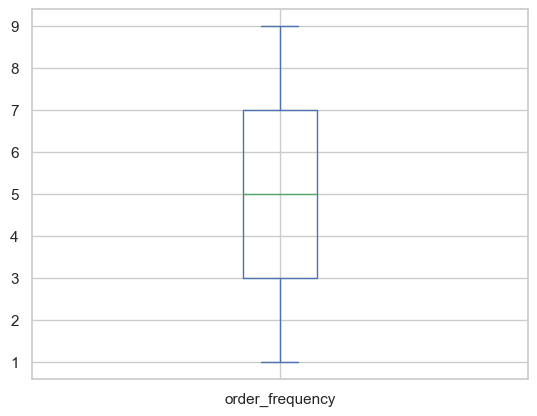

In [194]:
df['order_frequency'].plot(kind='box')

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\1310224547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_frequency', data=df, order=df['order_frequency'].value_counts().index, palette='viridis')


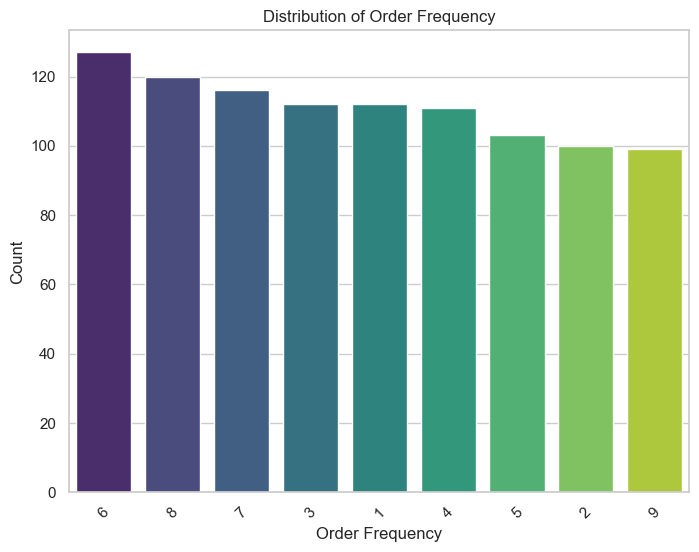

In [195]:
# Plotting bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='order_frequency', data=df, order=df['order_frequency'].value_counts().index, palette='viridis')
plt.title('Distribution of Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Order Frequency Analysis

## Key Insights:
- **Most Common Frequency**: **6 orders** (12.7%), followed by **7** (11.6%) and **8** (12.0%).
- **Infrequent Customers**: **33.4%** of customers order **1-3 times**.
- **Loyal Customers**: **9 orders** account for **9.9%** of customers.

## Actionable Points:
- **Target Core Group (6-8 orders)**: Focus on **36.3%** with loyalty programs and offers.
- **Re-engage Infrequent Customers (1-3 orders)**: Use **promotions** to boost their frequency.
- **Reward Loyal Customers (9 orders)**: Offer **exclusive rewards** to retain them.

## Conclusion:
Target core and loyal customers while re-engaging infrequent ones for better customer retention and increased orders.


## Discount Applied

In [196]:
df['discount_applied'].describe()

count    1000.00000
mean       14.72000
std        14.22758
min         0.00000
25%         0.00000
50%        15.00000
75%        25.00000
max        50.00000
Name: discount_applied, dtype: float64

In [197]:
df['discount_applied'].value_counts()

discount_applied
0     299
15    114
5     111
20    103
30    100
25     91
10     88
50     48
40     46
Name: count, dtype: int64

In [198]:
skewness = df['discount_applied'].skew()
kurtosis = df['discount_applied'].kurtosis()

print(f"Skewness of Discount Applied: {skewness}")
print(f"Kurtosis of Discount Applied: {kurtosis}")

Skewness of Discount Applied: 0.7859970486348143
Kurtosis of Discount Applied: -0.18839127373011078


Text(0, 0.5, 'Frequency')

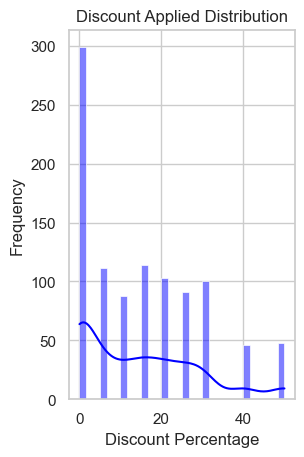

In [199]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['discount_applied'], bins=30, kde=True, color='blue')
plt.title('Discount Applied Distribution')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

### Key Insights from Discount Applied Distribution

1. **Focus on Popular Discount Tiers**: The most common discounts are **0%, 15%, and 5%**, indicating that **low to moderate discounts** are the most frequently applied. There's potential to strategically target or optimize these discount levels.
   
2. **Limited Use of Higher Discounts**: Discounts above **30%** (including 40% and 50%) are applied less frequently, representing an opportunity to either **increase the use of high-value promotions** or optimize them for better returns.

### Useful Observations:
` - 0% Discount Dominates `: A significant portion of transactions (299) receive **0% discount**, showing that many customers are not benefiting from discounts.
- **Declining Frequency with Higher Discounts**: The frequency of discounts **decreases as the value increases**, suggesting that high-value discounts are less common and may be targeted for special promotions or loyalty programs.


## Engagement Score

In [200]:
df['engagement_score'].describe()

count    1000.000000
mean       50.435000
std        28.985582
min         0.000000
25%        26.000000
50%        51.000000
75%        76.000000
max       100.000000
Name: engagement_score, dtype: float64

## **Effective Points:**
- **Targeted Engagement Strategies**: Focus on users with **low scores (0-10)** for improvement and try to push **moderate engagement** users towards higher engagement.
- **Personalized Approaches**: Due to high variability, tailor engagement efforts to the individual user's behavior to increase overall satisfaction and participation.

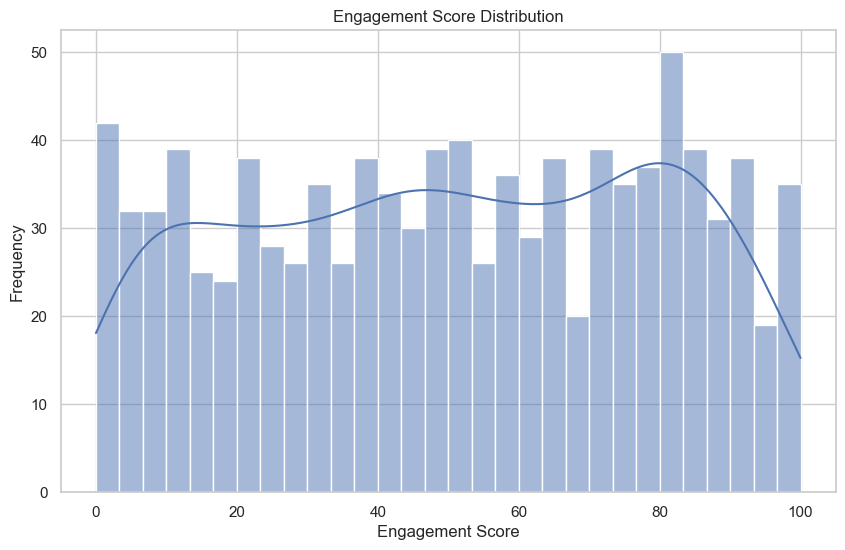

In [201]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['engagement_score'], bins=30, kde=True)
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()

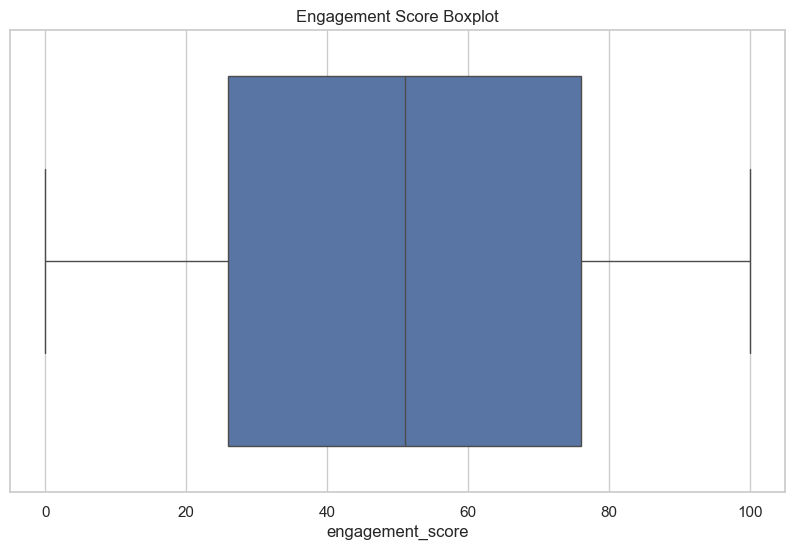

In [202]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['engagement_score'])
plt.title('Engagement Score Boxplot')
plt.show()

# Univariate Analysis on Categorical 
- `customer_id`
- `customer_location`
- `customer_type`
- `order_id`
- `order_date`
- `payment_method`
- `return_status`
- `product_category`
- `product_sku`
- `size`
- `inventory_status`
- `source`

### Customer location

In [203]:
df['customer_location'].value_counts()

customer_location
7    136
5    133
0    132
2    131
6    129
1    120
4    112
3    107
Name: count, dtype: int64

<Axes: xlabel='customer_location'>

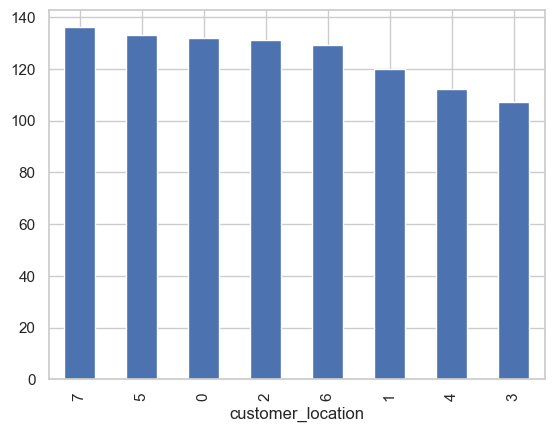

In [204]:
df['customer_location'].value_counts().plot(kind = 'bar')

### Notable Data: 
- ` Pune (136), Kolkata (133), and Bangalore (132) have the highest customer counts, while Jaipur (112) and Hyderabad (107) show lower numbers. `
  
` Recommended Actions: `
- Target Marketing: Focus campaigns on Pune, Kolkata, and Bangalore to boost engagement.
- Resource Allocation: Increase resources in high-customer cities for better sales outcomes.
- Explore Growth: Develop strategies to penetrate markets in Jaipur and Hyderabad.

## Customer Type 

In [205]:
df['customer_type'].describe()

count    1000.000000
mean        0.810000
std         0.392497
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: customer_type, dtype: float64

In [206]:
df['customer_type'].value_counts()

customer_type
1    810
0    190
Name: count, dtype: int64

<Axes: ylabel='count'>

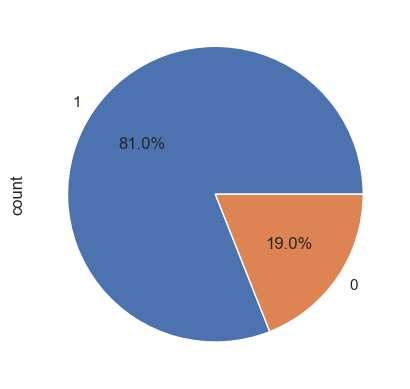

In [207]:
df['customer_type'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

### Observation:
`The data shows 810 returning customers (81%) compared to 190 new customers (19%), indicating a need to enhance customer acquisition strategies while maintaining strong engagement with existing clients. `

## Payment method

In [208]:
df['payment_method'].value_counts()

payment_method
1    209
0    209
2    201
4    198
3    183
Name: count, dtype: int64

<Axes: xlabel='payment_method'>

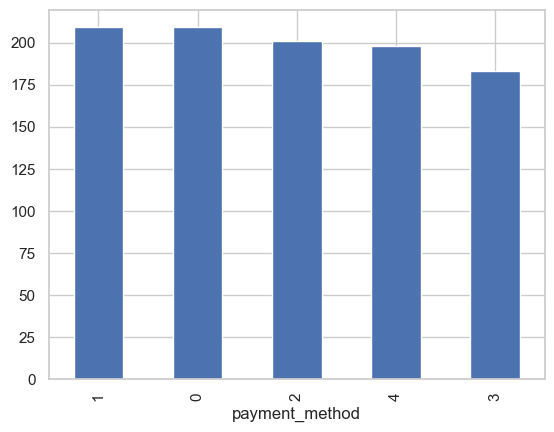

In [209]:
df['payment_method'].value_counts().plot(kind = 'bar')

###  Observation: 
* The data shows a strong preference for both traditional (Credit Card, COD) and digital payment methods (Net Banking, Wallet, UPI), indicating that maintaining diverse payment options and promoting digital methods could enhance customer satisfaction and boost sales.
* 
` Offer exclusive discounts for credit card and UPI transactions to attract users of these payment methods, driving usage and customer acquisition. `

# Return Status

In [210]:
df['return_status'].value_counts()

return_status
0    796
1    204
Name: count, dtype: int64

<Axes: ylabel='count'>

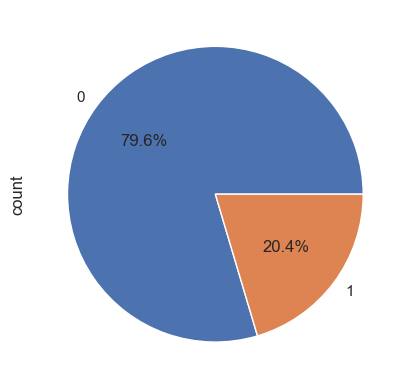

In [211]:
df['return_status'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

` Key Insights `
* Return Rate: 20.4% of transactions resulted in returns/refunds. This is a critical metric to monitor, as a high return rate can impact revenue and 
 customer satisfaction.

* Successful Sales: 79.6% of transactions were successful, indicating a strong majority of completed sales.

In [212]:
df.head()

customer_id  customer_tenure  customer_location  customer_type  order_id  \
0            0               39                  2              1         0   
1            1               52                  3              1         1   
2            2               29                  7              1         2   
3            3               15                  4              1         3   
4            4               43                  7              1         4   

   order_value  payment_method  order_frequency  discount_applied  \
0      4015.21               2                9                 5   
1      2205.61               1                3                15   
2       858.84               2                8                30   
3       500.00               3                1                 0   
4      1843.50               4                9                40   

   return_status  product_category  product_sku  size  inventory_status  \
0              0                 1            0     4                 0   
1              0                 5            1     2                 1   
2              0                 5            2     0                 0   
3              0                 5            3     4                 0   
4              1                 4            4     0                 0   

   source  engagement_score      CLV  CLV_Segment  order_value_bin  \
0       4                36  4015.21            2                3   
1       2                37  2205.61            1                3   
2       0                95   858.84            0                1   
3       4                10   500.00            0                0   
4       4                 0  1843.50            1                2   

   source_numeric  
0               4  
1               2  
2               0  
3               4  
4               4

## Product Category

In [213]:
df['product_category'].value_counts()

product_category
1    175
2    173
5    169
3    169
0    166
4    148
Name: count, dtype: int64

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\564603029.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product Category', data=product_category_df, palette='viridis')


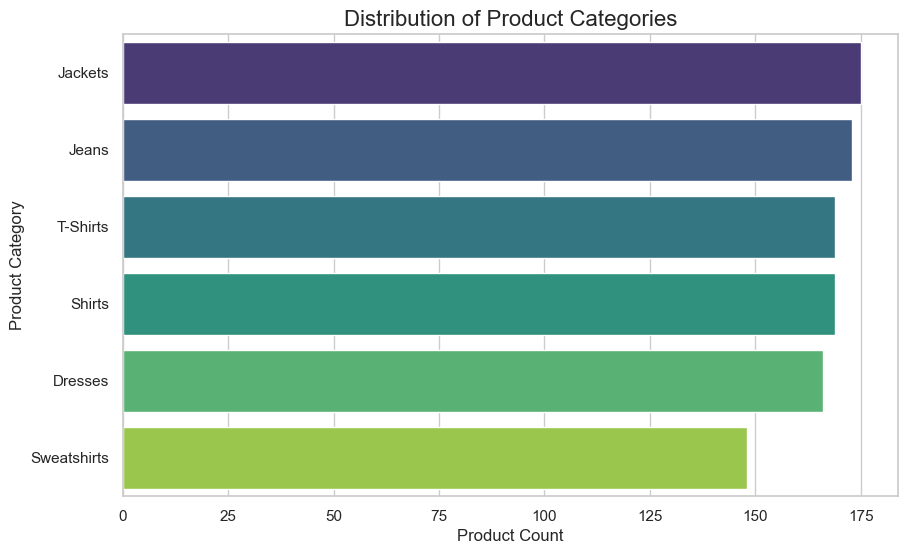

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Product category counts
product_category_counts = {'Jackets': 175, 'Jeans': 173, 'T-Shirts': 169, 
                           'Shirts': 169, 'Dresses': 166, 'Sweatshirts': 148}

# Convert to DataFrame for visualization
product_category_df = pd.DataFrame(list(product_category_counts.items()), columns=['Product Category', 'Count'])

# Set up the visualization style
sns.set(style="whitegrid")

# Plotting the bar chart for product category distribution
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Product Category', data=product_category_df, palette='viridis')
plt.title('Distribution of Product Categories', fontsize=16)
plt.xlabel('Product Count', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()


##### Observations:
`- The difference in the number of items sold in each category is relatively small, with no category having a significant lead or lag, appear to be well-distributed.`
* Jackets and Jeans have the highest frequency of sales, with both having counts close to 175.
* Sweatshirts have the lowest frequency (under 150), but the count difference is not large enough to indicate a major drop in sales relative to other categories.

## Product Size

In [215]:
df['size'].value_counts()

size
2    233
4    198
1    197
0    186
3    186
Name: count, dtype: int64

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2067929105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Size', data=size_df, palette='Blues_d')


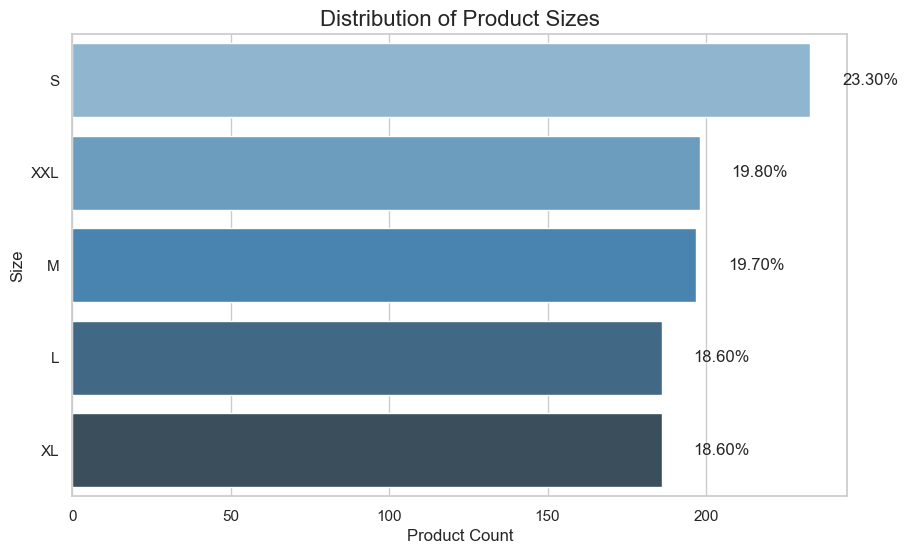

In [216]:
# Size counts
size_counts = {'S': 233, 'XXL': 198, 'M': 197, 'L': 186, 'XL': 186}

# Convert to DataFrame for visualization
size_df = pd.DataFrame(list(size_counts.items()), columns=['Size', 'Count'])

# Calculate percentage
size_df['Percentage'] = (size_df['Count'] / size_df['Count'].sum()) * 100

# Set up the visualization style
sns.set(style="whitegrid")

# Plotting the bar chart for size distribution with percentages
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Size', data=size_df, palette='Blues_d')

# Annotate percentages on the bars
for index, row in size_df.iterrows():
    plt.text(row['Count'] + 10, index, f"{row['Percentage']:.2f}%", va='center', fontsize=12)

plt.title('Distribution of Product Sizes', fontsize=16)
plt.xlabel('Product Count', fontsize=12)
plt.ylabel('Size', fontsize=12)
plt.show()


### Observations:
` Balanced Size Offering: `

* The sizes seem to be relatively well-balanced, with no extreme imbalances between the sizes.
* This distribution could indicate good inventory planning, as the sizes cater to different customer needs.

`Note`
- The popularity of S and XXL sizes suggests that stock levels of these sizes should be closely monitored to avoid stockouts.
- L and XL sizes have relatively similar counts, so there might be an opportunity to re-evaluate inventory management in those sizes.

## Inventory Status

In [217]:
df['inventory_status'].value_counts()

inventory_status
0    899
1    101
Name: count, dtype: int64

<Axes: ylabel='count'>

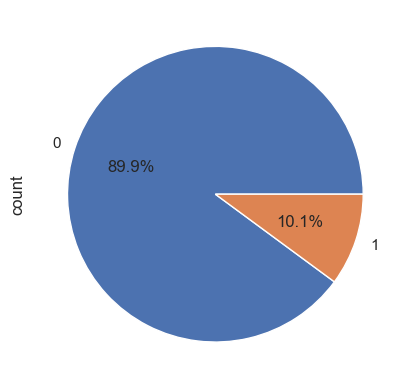

In [218]:
df['inventory_status'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

### Summary:
* In Stock products dominate the inventory (89.9%) almost 90%. This suggests that the company is maintaining good inventory levels.
  
` Although `
* Out of Stock products are in a minority(10%), which represents an opportunity for improvement in stock management.
* Since out of stock items account for a smaller portion (10%), it might be a good idea to monitor high-demand products more closely to prevent them from going out of stock, particularly for popular categories.

## Source

In [219]:
df['source'].value_counts()

source
0    219
1    219
4    190
3    187
2    185
Name: count, dtype: int64

<Axes: xlabel='source'>

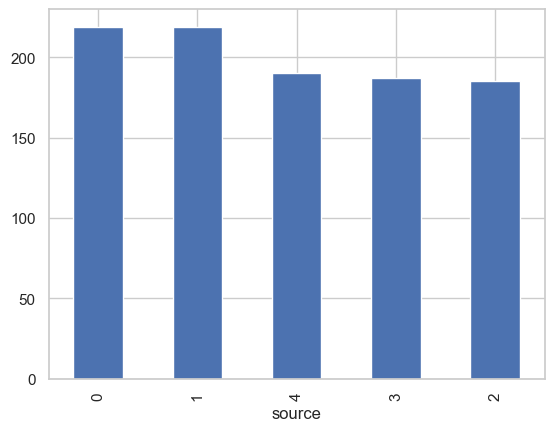

In [220]:
df['source'].value_counts().plot(kind = 'bar')

In [221]:
df.columns

Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_value', 'payment_method', 'order_frequency',
       'discount_applied', 'return_status', 'product_category', 'product_sku',
       'size', 'inventory_status', 'source', 'engagement_score', 'CLV',
       'CLV_Segment', 'order_value_bin', 'source_numeric'],
      dtype='object')

### Derived Insights:
 - Total Customers: 1,000 records in total, which are evenly distributed among the five channels.
 - Top Sources: Email Marketing and Facebook Ads are tied for the highest count, each contributing 219 customers.
 - Low Impact Sources: Instagram and Google Ads have a lower number of customers (187 and 185, respectively).
                                                         
` * Next Steps in Analysis: `
 - A/B Testing: For the channels with lower counts (Instagram and Google Ads), you could run experiments to test different ad formats, messages, or offers to optimize performance.
 - ROI Analysis: Compare the customer acquisition cost (CAC) for each source to evaluate which channel offers the best return on investment (ROI).                                                        

In [222]:
df.head()

customer_id  customer_tenure  customer_location  customer_type  order_id  \
0            0               39                  2              1         0   
1            1               52                  3              1         1   
2            2               29                  7              1         2   
3            3               15                  4              1         3   
4            4               43                  7              1         4   

   order_value  payment_method  order_frequency  discount_applied  \
0      4015.21               2                9                 5   
1      2205.61               1                3                15   
2       858.84               2                8                30   
3       500.00               3                1                 0   
4      1843.50               4                9                40   

   return_status  product_category  product_sku  size  inventory_status  \
0              0                 1            0     4                 0   
1              0                 5            1     2                 1   
2              0                 5            2     0                 0   
3              0                 5            3     4                 0   
4              1                 4            4     0                 0   

   source  engagement_score      CLV  CLV_Segment  order_value_bin  \
0       4                36  4015.21            2                3   
1       2                37  2205.61            1                3   
2       0                95   858.84            0                1   
3       4                10   500.00            0                0   
4       4                 0  1843.50            1                2   

   source_numeric  
0               4  
1               2  
2               0  
3               4  
4               4

# Bivariate Analysis
` understanding relationships, correlations, and dependencies `

In [223]:
df.isnull().sum()

customer_id          0
customer_tenure      0
customer_location    0
customer_type        0
order_id             0
order_value          0
payment_method       0
order_frequency      0
discount_applied     0
return_status        0
product_category     0
product_sku          0
size                 0
inventory_status     0
source               0
engagement_score     0
CLV                  0
CLV_Segment          0
order_value_bin      0
source_numeric       0
dtype: int64

## Customer Behavior Analysis

 #### 1. Does tenure influence purchase frequency?

In [224]:
pd.crosstab(df['customer_tenure'],df['order_frequency'],normalize='columns') * 100

order_frequency         1    2         3         4         5         6  \
customer_tenure                                                          
1                2.678571  1.0  2.678571  4.504505  1.941748  0.787402   
2                1.785714  1.0  1.785714  0.900901  0.970874  0.787402   
3                0.892857  2.0  0.892857  2.702703  1.941748  0.787402   
4                1.785714  0.0  0.000000  2.702703  2.912621  1.574803   
5                1.785714  2.0  2.678571  4.504505  1.941748  0.787402   
6                0.000000  1.0  1.785714  1.801802  1.941748  2.362205   
7                2.678571  2.0  1.785714  1.801802  0.970874  1.574803   
8                3.571429  2.0  0.000000  0.900901  2.912621  0.787402   
9                0.892857  0.0  0.892857  0.900901  1.941748  0.000000   
10               0.000000  2.0  0.892857  0.900901  0.970874  2.362205   
11               0.892857  1.0  0.000000  1.801802  1.941748  2.362205   
12               0.892857  2.0  0.892857  1.801802  1.941748  1.574803   
13               0.892857  1.0  2.678571  1.801802  0.000000  2.362205   
14               0.892857  2.0  0.892857  0.000000  1.941748  1.574803   
15               3.571429  0.0  0.892857  0.900901  0.970874  0.787402   
16               4.464286  1.0  2.678571  1.801802  0.000000  1.574803   
17               0.000000  2.0  0.892857  0.900901  3.883495  3.149606   
18               0.000000  2.0  0.892857  0.000000  0.000000  0.787402   
19               0.892857  1.0  2.678571  1.801802  0.000000  3.937008   
20               0.892857  2.0  0.892857  1.801802  1.941748  1.574803   
21               1.785714  4.0  0.000000  0.000000  1.941748  2.362205   
22               0.892857  3.0  1.785714  0.900901  1.941748  1.574803   
23               1.785714  3.0  3.571429  0.900901  0.970874  2.362205   
24               1.785714  3.0  1.785714  1.801802  2.912621  3.149606   
25               1.785714  3.0  0.892857  0.000000  1.941748  3.937008   
26               0.892857  2.0  2.678571  1.801802  2.912621  0.787402   
27               1.785714  2.0  0.892857  0.000000  1.941748  0.787402   
28               0.892857  1.0  5.357143  1.801802  2.912621  2.362205   
29               3.571429  2.0  1.785714  1.801802  0.970874  0.000000   
30               1.785714  1.0  0.892857  1.801802  1.941748  1.574803   
31               0.000000  1.0  2.678571  0.000000  0.000000  0.000000   
32               1.785714  1.0  1.785714  2.702703  5.825243  1.574803   
33               3.571429  3.0  2.678571  2.702703  0.970874  1.574803   
34               0.892857  0.0  0.000000  2.702703  0.970874  1.574803   
35               7.142857  2.0  1.785714  3.603604  3.883495  0.787402   
36               1.785714  1.0  1.785714  2.702703  0.970874  1.574803   
37               2.678571  3.0  2.678571  2.702703  1.941748  1.574803   
38               0.000000  0.0  1.785714  1.801802  0.970874  2.362205   
39               0.892857  3.0  1.785714  1.801802  0.970874  2.362205   
40               2.678571  3.0  0.892857  0.000000  0.970874  1.574803   
41               0.000000  1.0  1.785714  1.801802  0.970874  1.574803   
42               0.000000  0.0  0.000000  0.900901  2.912621  3.149606   
43               0.000000  0.0  1.785714  0.000000  0.000000  1.574803   
44               0.892857  2.0  2.678571  2.702703  1.941748  2.362205   
45               2.678571  0.0  1.785714  2.702703  2.912621  2.362205   
46               1.785714  1.0  1.785714  0.900901  0.000000  0.787402   
47               3.571429  1.0  0.000000  0.900901  0.970874  3.149606   
48               0.892857  2.0  0.892857  1.801802  1.941748  1.574803   
49               3.571429  3.0  1.785714  2.702703  1.941748  2.362205   
50               0.000000  2.0  3.571429  0.000000  0.970874  0.787402   
51               0.000000  1.0  1.785714  1.801802  2.912621  0.787402   
52               1.785714  2.0  2.678571  1.801802  1.941748  2.362205   
53  

In [262]:
import pandas as pd

# Aggregate required metrics
clv_data = df.groupby("customer_id").agg(
    total_revenue=("order_value", "sum"),
    total_orders=("order_id", "count"),
    avg_order_value=("order_value", "mean"),
    customer_tenure=("customer_tenure", "max")
).reset_index()

# Compute CLV
clv_data["CLV"] = clv_data["avg_order_value"] * (clv_data["total_orders"] / clv_data["customer_tenure"]) * clv_data["customer_tenure"]

# Merge CLV back to the original DataFrame
df = df.merge(clv_data[["customer_id", "CLV"]], on="customer_id", how="left")


In [263]:
df.head()

customer_id  customer_tenure  customer_location  customer_type  order_id  \
0            0               39                  2              1         0   
1            1               52                  3              1         1   
2            2               29                  7              1         2   
3            3               15                  4              1         3   
4            4               43                  7              1         4   

   order_value  payment_method  order_frequency  discount_applied  \
0      4015.21               2                9                 5   
1      2205.61               1                3                15   
2       858.84               2                8                30   
3       500.00               3                1                 0   
4      1843.50               4                9                40   

   return_status  product_category  product_sku  size  inventory_status  \
0              0                 1            0     4                 0   
1              0                 5            1     2                 1   
2              0                 5            2     0                 0   
3              0                 5            3     4                 0   
4              1                 4            4     0                 0   

   source  engagement_score    CLV_x  CLV_Segment order_value_bin  \
0       4                36  4015.21            2       2000-5000   
1       2                37  2205.61            1       2000-5000   
2       0                95   858.84            0        500-1000   
3       4                10   500.00            0           0-500   
4       4                 0  1843.50            1       1000-2000   

   source_numeric    CLV_y      CLV  
0               4  4015.21  4015.21  
1               2  2205.61  2205.61  
2               0   858.84   858.84  
3               4   500.00   500.00  
4               4  1843.50  1843.50

In [264]:
df['CLV'].describe()

count    1000.000000
mean     2600.555060
std      1394.337968
min       500.000000
25%      1565.915000
50%      2541.280000
75%      3541.415000
max      7251.060000
Name: CLV, dtype: float64

### 
CLV Distribution

 - Low CLV (Bottom 25%) → ₹1565.92 or less
 - Medium CLV (Middle 50%) → ₹1565.92 - ₹3541.42
 - High CLV (Top 25%) → ₹3541.42 or more

🌟 Business Insights

 - Diverse spending habits seen across customers.
 - Loyalty programs can boost high CLV retention.
 - Retention strategies needed for low CLV customers.

In [265]:
# Define segmentation based on CLV percentiles
df["CLV_Segment"] = pd.cut(df["CLV"], 
                           bins=[df["CLV"].min(), 1565, 3541, df["CLV"].max()], 
                           labels=["Low CLV", "Medium CLV", "High CLV"], 
                           include_lowest=True)

# Display updated DataFrame
print(df[["customer_id", "CLV", "CLV_Segment"]].head())

   customer_id      CLV CLV_Segment
0            0  4015.21    High CLV
1            1  2205.61  Medium CLV
2            2   858.84     Low CLV
3            3   500.00     Low CLV
4            4  1843.50  Medium CLV


In [266]:
df.head()

customer_id  customer_tenure  customer_location  customer_type  order_id  \
0            0               39                  2              1         0   
1            1               52                  3              1         1   
2            2               29                  7              1         2   
3            3               15                  4              1         3   
4            4               43                  7              1         4   

   order_value  payment_method  order_frequency  discount_applied  \
0      4015.21               2                9                 5   
1      2205.61               1                3                15   
2       858.84               2                8                30   
3       500.00               3                1                 0   
4      1843.50               4                9                40   

   return_status  product_category  product_sku  size  inventory_status  \
0              0                 1            0     4                 0   
1              0                 5            1     2                 1   
2              0                 5            2     0                 0   
3              0                 5            3     4                 0   
4              1                 4            4     0                 0   

   source  engagement_score    CLV_x CLV_Segment order_value_bin  \
0       4                36  4015.21    High CLV       2000-5000   
1       2                37  2205.61  Medium CLV       2000-5000   
2       0                95   858.84     Low CLV        500-1000   
3       4                10   500.00     Low CLV           0-500   
4       4                 0  1843.50  Medium CLV       1000-2000   

   source_numeric    CLV_y      CLV  
0               4  4015.21  4015.21  
1               2  2205.61  2205.61  
2               0   858.84   858.84  
3               4   500.00   500.00  
4               4  1843.50  1843.50

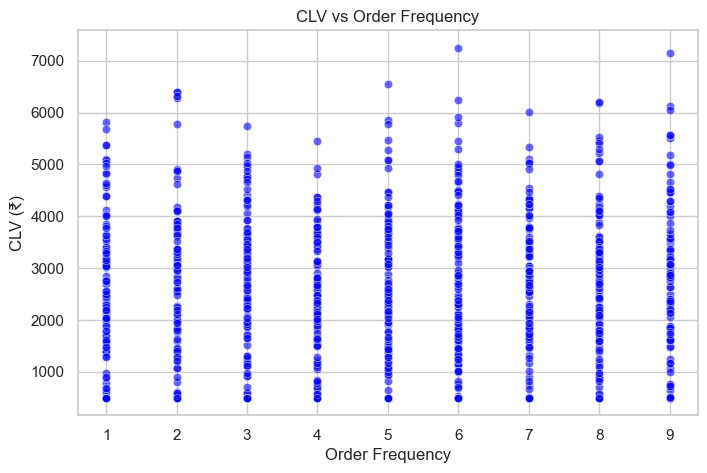

In [267]:
# CLV vs Order Frequency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["order_frequency"], y=df["CLV"], alpha=0.6, color="blue")
plt.title("CLV vs Order Frequency")
plt.xlabel("Order Frequency")
plt.ylabel("CLV (₹)")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\3254117445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["discount_applied"], y=df["CLV"], palette="coolwarm")


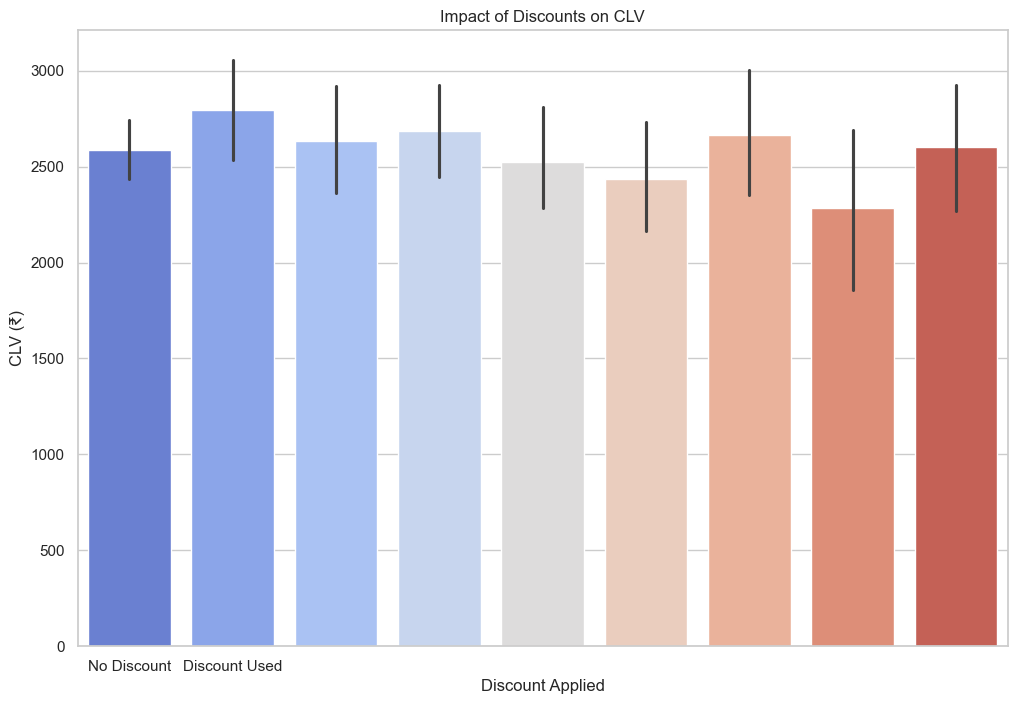

In [268]:
#Impact of Discount on CLV
plt.figure(figsize=(12, 8))
sns.barplot(x=df["discount_applied"], y=df["CLV"], palette="coolwarm")
plt.xticks([0, 1], ["No Discount", "Discount Used"])
plt.title("Impact of Discounts on CLV")
plt.xlabel("Discount Applied")
plt.ylabel("CLV (₹)")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\3349189324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["return_status"], y=df["CLV"], palette="pastel")


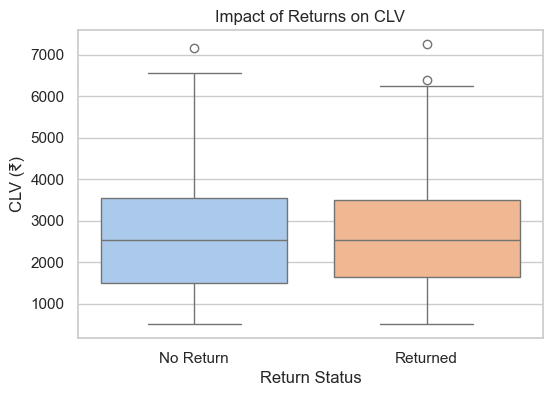

In [269]:
# Return Status vs CLV
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["return_status"], y=df["CLV"], palette="pastel")
plt.xticks([0, 1], ["No Return", "Returned"])
plt.title("Impact of Returns on CLV")
plt.xlabel("Return Status")
plt.ylabel("CLV (₹)")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\1402175517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["payment_method"], y=df["CLV"], palette="viridis")


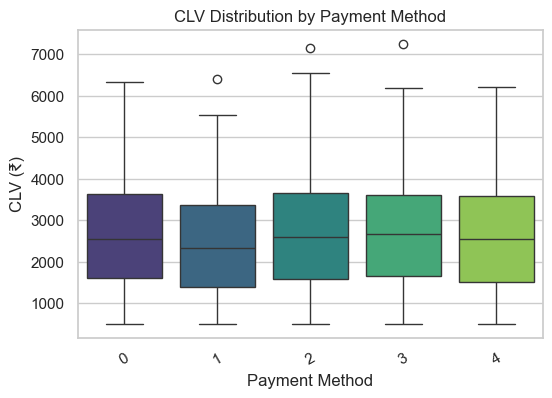

In [270]:
# Payment Method vs CLV
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["payment_method"], y=df["CLV"], palette="viridis")
plt.title("CLV Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("CLV (₹)")
plt.xticks(rotation=30)
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\1319380312.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_segments = df.groupby("CLV_Segment")["CLV"].count()
C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\1319380312.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clv_segments.index, y=clv_segments.values, palette="muted")


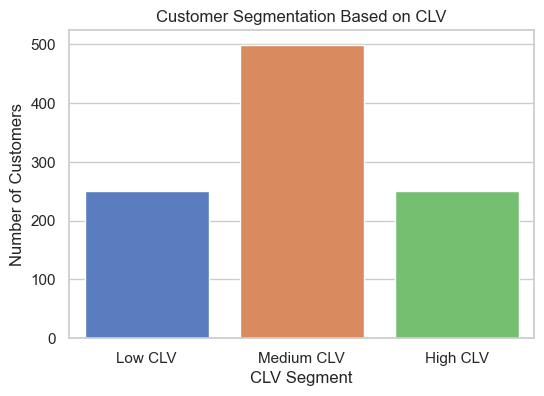

In [271]:
# CLV Segmentation - Bar Chart
clv_segments = df.groupby("CLV_Segment")["CLV"].count()
plt.figure(figsize=(6, 4))
sns.barplot(x=clv_segments.index, y=clv_segments.values, palette="muted")
plt.title("Customer Segmentation Based on CLV")
plt.xlabel("CLV Segment")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\1615045046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['customer_type'], y=df['order_value'], palette="pastel")


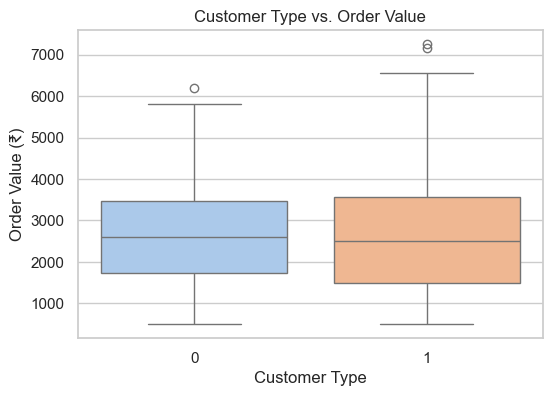

In [272]:
# Do new or returning customers spend more?
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['customer_type'], y=df['order_value'], palette="pastel")
plt.title("Customer Type vs. Order Value")
plt.xlabel("Customer Type")
plt.ylabel("Order Value (₹)")
plt.show()

In [273]:
# From the given box plots we can claearly see  the returning customers spend more than the New customers

# Sales Performance: 
- Identify top-performing products, seasonal trends, and revenue drivers.

In [274]:
df.columns

Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_value', 'payment_method', 'order_frequency',
       'discount_applied', 'return_status', 'product_category', 'product_sku',
       'size', 'inventory_status', 'source', 'engagement_score', 'CLV_x',
       'CLV_Segment', 'order_value_bin', 'source_numeric', 'CLV_y', 'CLV'],
      dtype='object')

In [275]:
# Grouping total revenue (order_value) by product category
category_sales = df.groupby("product_category")["order_value"].sum().sort_values(ascending=False).reset_index()

# Display results
print("📊 Total Revenue by Product Category:\n")
print(category_sales)

📊 Total Revenue by Product Category:

   product_category  order_value
0                 1    487692.11
1                 3    443247.27
2                 2    431396.90
3                 5    429779.54
4                 0    407475.19
5                 4    400964.05


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2168899206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")


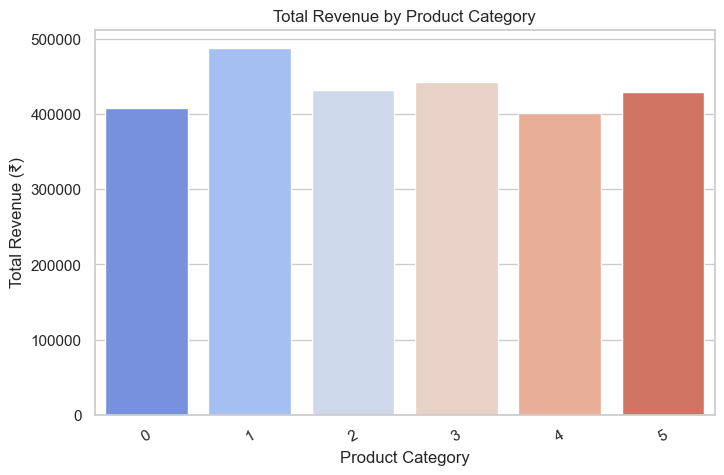

In [276]:
# 1️⃣ Revenue vs Product Category (Bar Chart)
plt.figure(figsize=(8, 5))
category_sales = df.groupby("product_category")["order_value"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=30)
plt.show()

# 📊 Total Revenue by Product Category  

## **🔹 Revenue Breakdown**  

| Product Category | Total Revenue (₹) |
|-----------------|------------------|
| 🧥 Jackets       | ₹487,692.11      |
| 👕 Shirts        | ₹443,247.27      |
| 👖 Jeans         | ₹431,396.90      |
| 👚 T-Shirts      | ₹429,779.54      |
| 👗 Dresses       | ₹407,475.19      |
| 👕 Sweatshirts   | ₹400,964.05      |

---

## **📌 Key Insights**  

✔ **Jackets generate the highest revenue (₹487K)** → Seasonal demand may play a role.  
✔ **Shirts, Jeans, and T-Shirts contribute similarly (~₹430K each)** → Strong customer preference.  
✔ **Dresses & Sweatshirts also perform well (~₹400K)** → Steady demand across categories.  

---

## **📌 Business Recommendations**  

✔ **Optimize inventory for Jackets** → Ensure stock availability in peak seasons.  
✔ **Boost marketing for Shirts, Jeans & T-Shirts** → High demand justifies promotions.  
✔ **Analyze Dress & Sweatshirt trends** → Identify growth opportunities (seasonal or casual wear).  
✔ **Use targeted promotions** → Offer bundle discounts on top-performing categories.  
✔ **Leverage customer insights** → Identify best-selling styles & optimize pricing.  

---

### **💡 Next Steps**  
🔹 Need a **product-level deep dive**? Analyze size, color, and seasonal trends! 📊  


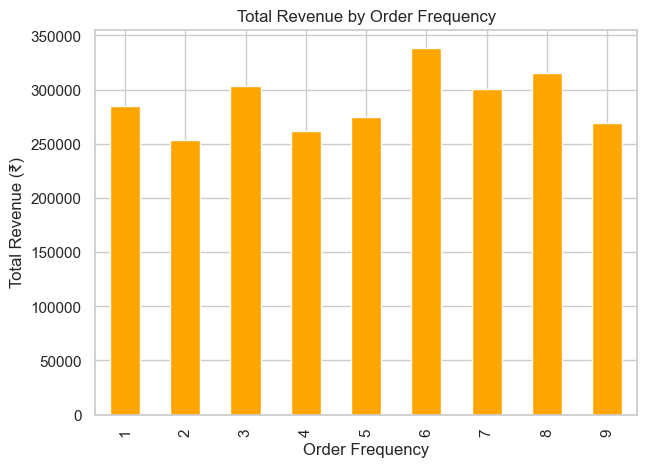

In [277]:
# 2️⃣ Revenue vs Order Frequency
df.groupby("order_frequency")["order_value"].sum().plot(kind="bar", figsize=(7, 5), color="orange")
plt.title("Total Revenue by Order Frequency")
plt.xlabel("Order Frequency")
plt.ylabel("Total Revenue (₹)")
plt.show()

`Conclusion : Order Frequency doesn't have the significant effect over the Revenue, But frequeny of 6 has the highest revenue sharing.`

Revenue Contribution by Discount Percentage:
   discount_applied  order_value
0                 0    774065.25
1                 5    310459.21
2                10    231886.55
3                15    306279.83
4                20    259899.45
5                25    221710.44
6                30    266332.77
7                40    104966.64
8                50    124954.92


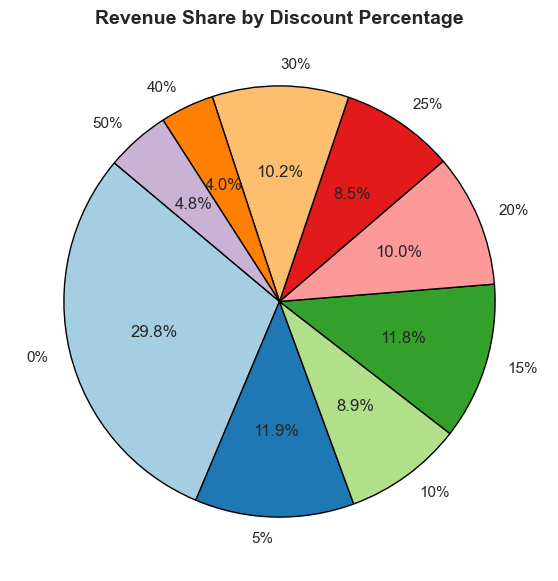

In [278]:
# Grouping total revenue (order_value) by discount percentage (discount_applied)
discount_revenue = df.groupby("discount_applied")["order_value"].sum()

# Display the numerical values before visualization
print("Revenue Contribution by Discount Percentage:")
print(discount_revenue.to_frame().reset_index())  # Converts Series to DataFrame for better readability

# Generating labels with discount percentages
labels = [f"{int(d)}%" for d in discount_revenue.index]  

# Creating a simple pie chart
plt.figure(figsize=(7, 7))
plt.pie(discount_revenue, labels=labels, autopct="%1.1f%%", startangle=140, 
        colors=plt.cm.Paired.colors, wedgeprops={"edgecolor": "black"})

# Adding a title
plt.title("Revenue Share by Discount Percentage", fontsize=14, fontweight="bold")

# Show plot
plt.show()

## 📌 Business Recommendations  

🚀 **No Discount Generates the Highest Revenue** (₹774,065.25)
✔ **Limit discounts on high-selling products** – Full-price sales dominate revenue.  
✔ **Focus on 10%-30% discounts** – Drives strong revenue without excessive profit loss.  
✔ **Avoid deep discounts (40%-50%)** – Use only for clearance sales, as they contribute minimal revenue.  
✔ **Leverage 15%-20% discounts for promotions** – Optimal range for boosting sales effectively.  
✔ **Test A/B pricing strategies** – Identify the best-performing discount levels for maximum engagement.  


Revenue Contribution by Return Status:
   return_status  order_value
0              0   2061975.25
1              1    538579.81


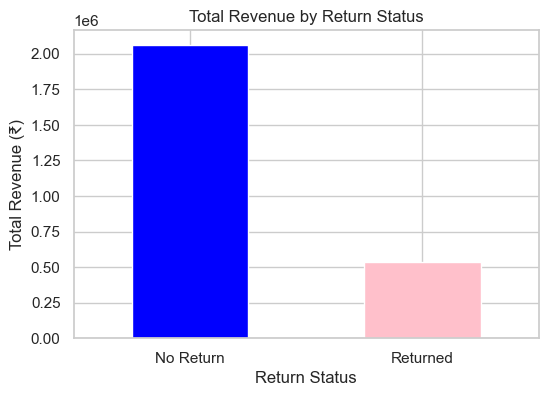

In [279]:
# Retun vs Order value
# Grouping total revenue (order_value) by return status
return_revenue = df.groupby("return_status")["order_value"].sum()

# Display the numerical values before visualization
print("Revenue Contribution by Return Status:")
print(return_revenue.to_frame().reset_index())  # Converts Series to DataFrame for readability

# Creating a bar chart
plt.figure(figsize=(6, 4))
return_revenue.plot(kind="bar", color=["blue", "pink"])

# Adjusting labels
plt.xticks(ticks=range(len(return_revenue)), labels=["No Return", "Returned"], rotation=0)
plt.title("Total Revenue by Return Status")
plt.xlabel("Return Status")
plt.ylabel("Total Revenue (₹)")

# Show the chart
plt.show()

# 📊 Revenue Contribution by Return Status  

## **🔹 Key Insights**  

✔ **80% of revenue (₹2M) comes from non-returned orders** → High customer satisfaction.  
✔ **Returns account for ₹538K (~20% revenue loss)** → Indicates product issues (quality, sizing, expectations).  
✔ **Returns drain profits** → Need better return management & product improvements.  
✔ **Discounted products may have higher returns** → Requires analysis & refined pricing strategy.  

---

## **📌 Business Actions**  

✔ Improve **product quality & descriptions** to reduce returns.  
✔ Identify & fix issues in **high-return products**.  
✔ Offer **exchanges over refunds** to retain revenue.  
✔ Analyze **discount impact on returns** to optimize promotions.  
✔ Use **customer feedback** to address recurring complaints.  

# Marketing Effectiveness: 
 - Assess the impact of different marketing channels (Instagram, Google Ads, etc.) on conversion rates.

### 1️⃣ Revenue vs Marketing Channel

📊 Total Revenue by Marketing Channel:
 source
0    556655.12
1    554021.25
4    532801.24
3    485037.28
2    472040.17
Name: order_value, dtype: float64


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2287583320.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_revenue.index, y=source_revenue.values, palette="coolwarm")


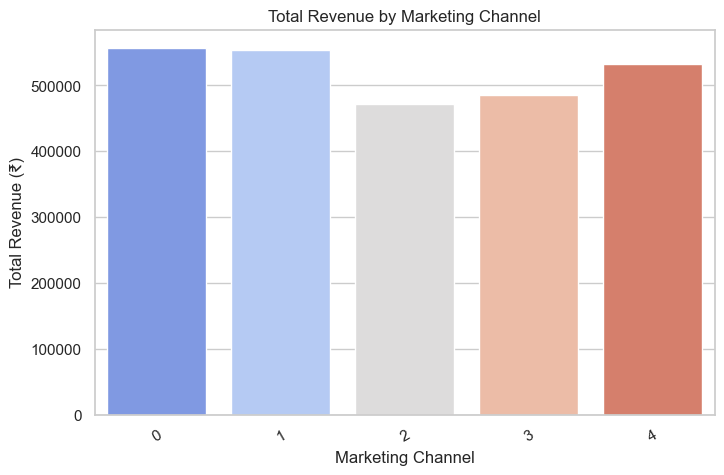

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping revenue by marketing channel
source_revenue = df.groupby("source")["order_value"].sum().sort_values(ascending=False)

# Display numerical values
print("📊 Total Revenue by Marketing Channel:\n", source_revenue)

plt.figure(figsize=(8, 5))
source_revenue = df.groupby("source")["order_value"].sum().sort_values(ascending=False)
sns.barplot(x=source_revenue.index, y=source_revenue.values, palette="coolwarm")
plt.title("Total Revenue by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=30)
plt.show()

# 📊 Total Revenue by Marketing Channel

| Marketing Channel  | Total Revenue (₹) |
|--------------------|------------------:|
| 📧 Email Marketing | 5,56,655.12 |
| 📘 Facebook Ads    | 5,54,021.25 |
| 🗣️ Word of Mouth  | 5,32,801.24 |
| 📸 Instagram       | 4,85,037.28 |
| 🔍 Google Ads     | 4,72,040.17 |

## 🔍 Key Insights
✔ **Email Marketing & Facebook Ads lead revenue** – These channels contribute the highest revenue, making them highly effective for conversions.  
✔ **Word of Mouth performs strongly** – Customer referrals generate significant revenue, indicating high brand trust.  
✔ **Instagram & Google Ads underperform** – Despite high visibility, they generate lower revenue than other channels.  

## 📌 Business Recommendations
✅ **Invest in Email Marketing & Facebook Ads** – Scale campaigns in these channels for maximum ROI.  
✅ **Leverage Word of Mouth** – Encourage referrals through incentives, loyalty programs, and customer testimonials.  
✅ **Optimize Instagram & Google Ads** – Improve targeting strategies and test A/B campaigns to boost conversion rates.  
✅ **Analyze Customer Journey** – Identify why Instagram and Google Ads drive lower revenue and refine ad creatives and messaging accordingly.  

---


📊 Average Engagement Score by Marketing Channel:
 source
2    52.745946
3    51.058824
0    50.191781
4    49.910526
1    48.648402
Name: engagement_score, dtype: float64


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2349266670.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_engagement.index, y=source_engagement.values, palette="coolwarm")


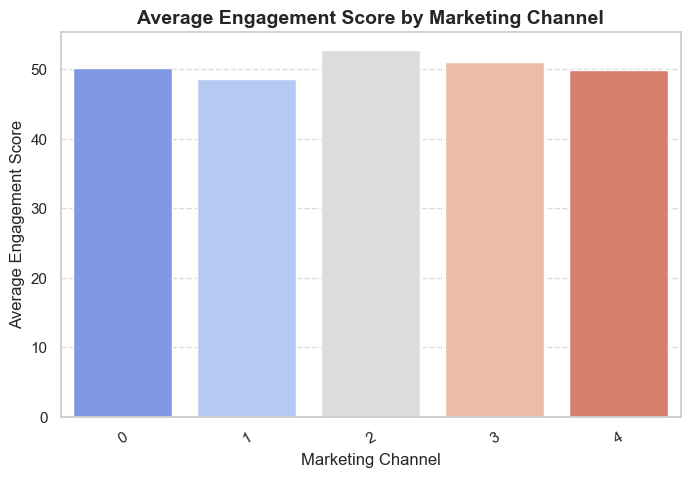

In [281]:
# Grouping engagement score by marketing channel
source_engagement = df.groupby("source")["engagement_score"].mean().sort_values(ascending=False)

# Display numerical values
print("📊 Average Engagement Score by Marketing Channel:\n", source_engagement)

# Bar plot for better clarity
plt.figure(figsize=(8, 5))
sns.barplot(x=source_engagement.index, y=source_engagement.values, palette="coolwarm")

# Formatting
plt.title("Average Engagement Score by Marketing Channel", fontsize=14, fontweight="bold")
plt.xlabel("Marketing Channel", fontsize=12)
plt.ylabel("Average Engagement Score", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


# 📊 Engagement Score by Marketing Channel  

| Marketing Channel   | Avg. Engagement Score |
|---------------------|----------------------|
| **Google Ads**      | 52.74                |
| **Instagram**       | 51.06                |
| Email Marketing    | 50.19                |
| Word of Mouth      | 49.91                |
| **Facebook Ads**    | 48.64 (Lowest)       |

## 🔍 Key Insights  
✔ **Google Ads & Instagram** drive the highest engagement.  
✔ **Facebook Ads** have the lowest engagement—needs optimization.  
✔ **Email & Word of Mouth** show strong customer interaction.  

## 📌 Recommendations  
✅ Invest more in **Google Ads & Instagram** for better conversions.  
✅ Improve **Facebook Ads** strategy (better targeting & creatives).  
✅ Optimize **email campaigns** with personalization & automation.  
✅ Strengthen **word-of-mouth marketing** via referral programs.  

`💡 **Conclusion:** High engagement ≠ high revenue. Align engagement strategies with conversions for real impact. 🚀  `


### 3️⃣ Order Frequency vs Marketing Channel

📊 Average Order Frequency by Marketing Channel:
 source
0    5.264840
1    5.196347
2    4.962162
3    4.839572
4    4.831579
Name: order_frequency, dtype: float64


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\417139021.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="source", y="order_frequency", data=df, palette="muted")


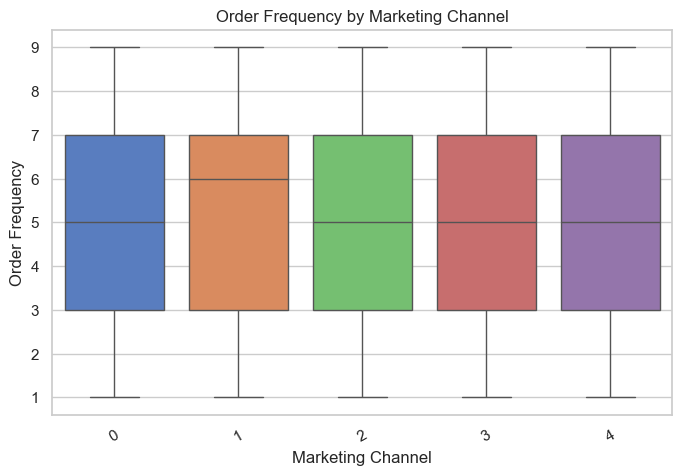

In [282]:
# Grouping order frequency by marketing channel
source_frequency = df.groupby("source")["order_frequency"].mean().sort_values(ascending=False)

# Display numerical values
print("📊 Average Order Frequency by Marketing Channel:\n", source_frequency)

plt.figure(figsize=(8, 5))
sns.boxplot(x="source", y="order_frequency", data=df, palette="muted")
plt.title("Order Frequency by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Order Frequency")
plt.xticks(rotation=30)
plt.show()

` 📌 Email Marketing & Facebook Ads drive the highest order frequency, while Word of Mouth has the lowest—suggesting a need for stronger retention strategies.`

`📌 Word of Mouth delivers the highest CLV, indicating strong long-term value, while Facebook Ads has the lowest, suggesting a need for better customer retention strategies.`

# Return Analysis:
`Examine the correlation between discounts, product categories, and return rates`

In [283]:
df["return_status"] = df["return_status"].replace({"No": 0, "Yes": 1}).astype(int)

### Return Rate vs Discount Level

📊 Return Rate by Discount Percentage:
 discount_applied
0     19.063545
5     14.414414
10    18.181818
15    21.929825
20    21.359223
25    17.582418
30    21.000000
40    39.130435
50    27.083333
Name: return_status, dtype: float64


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2664475087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["discount_applied"], y=df["return_status"], estimator=lambda x: np.mean(x) * 100, palette="coolwarm")


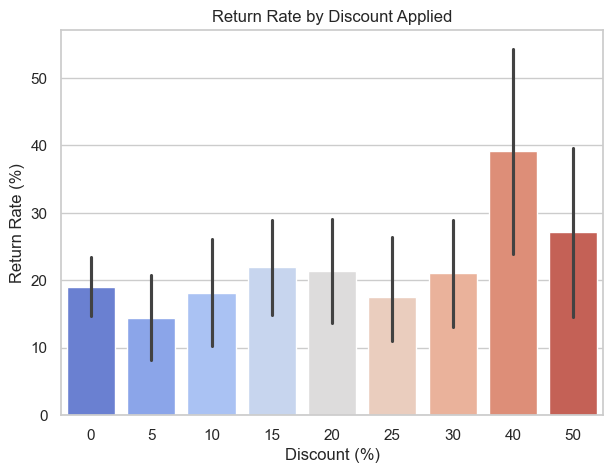

In [284]:
# Calculating return rate for each discount level
discount_returns = df.groupby("discount_applied")["return_status"].mean() * 100
print("📊 Return Rate by Discount Percentage:\n", discount_returns)

plt.figure(figsize=(7, 5))
sns.barplot(x=df["discount_applied"], y=df["return_status"], estimator=lambda x: np.mean(x) * 100, palette="coolwarm")
plt.title("Return Rate by Discount Applied")
plt.xlabel("Discount (%)")
plt.ylabel("Return Rate (%)")
plt.show()

# 📊 Return Rate by Discount Percentage

## 🔢 Key Data:
| Discount % | Return Rate (%) |
|------------|---------------|
| 0%        | 19.06%        |
| 5%        | 14.41%        |
| 10%       | 18.18%        |
| 15%       | 21.93%        |
| 20%       | 21.36%        |
| 25%       | 17.58%        |
| 30%       | 21.00%        |
| 40%       | 39.13% 🚨    |
| 50%       | 27.08% 🚨    |

## 🔍 Insights:
✔ **Higher Discounts Lead to More Returns** – Return rates spike at **40% (39.1%)** and **50% (27.08%)**, likely due to impulse buying.  
✔ **Moderate Discounts (5%-25%) Perform Better** – Lower return rates indicate more intentional purchases.  
✔ **No Discount Orders Still Have a 19% Return Rate** – Returns are influenced by factors beyond pricing (e.g., product quality, sizing issues).  

## 📌 Business Recommendations:
✔ **Limit Deep Discounts (40%-50%)** – These lead to excessive returns and revenue loss.  
✔ **Optimize Product Listings** – Improve descriptions and images to reduce return rates.  
✔ **Analyze High-Return Products** – Identify problematic categories driving excessive returns.  
✔ **Test Smart Discounting** – Focus on 10%-25% discounts, which maintain revenue while keeping returns manageable.  



### 2️⃣ Returns vs Product Category

📊 Return Rate by Product Category:
 product_category
0    19.277108
1    17.142857
2    23.699422
3    22.485207
4    20.945946
5    18.934911
Name: return_status, dtype: float64


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2312272223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_returns.index, y=category_returns.values, palette="coolwarm")


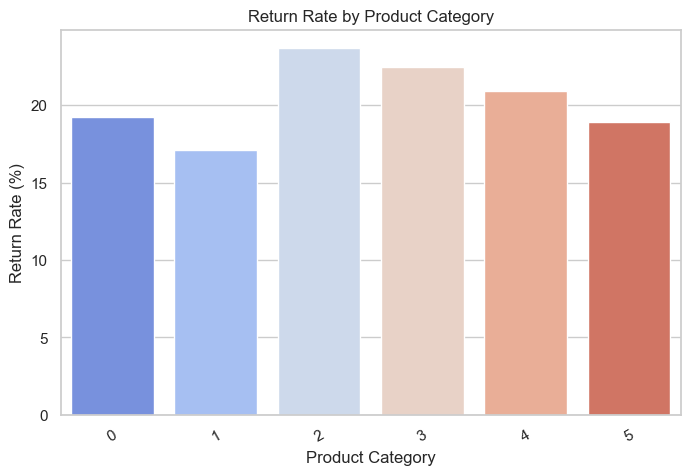

In [285]:
# Calculating return rate for each product category
category_returns = df.groupby("product_category")["return_status"].mean() * 100
print("📊 Return Rate by Product Category:\n", category_returns)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_returns.index, y=category_returns.values, palette="coolwarm")
plt.title("Return Rate by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=30)
plt.show()


## 📊 Return Rate by Product Category

## 🔢 Key Data:
| Product Category | Return Rate (%) |
|-----------------|---------------|
| **Dresses**     | 19.28%        |
| **Jackets**     | 17.14%        |
| **Jeans**       | **23.70%** 🚨    |
| **Shirts**      | **22.49%** 🚨    |
| **Sweatshirts** | 20.95%        |
| **T-Shirts**    | 18.93%        |

## 🔍 Insights:
✔ **Jeans & Shirts Have the Highest Return Rates (23.7% & 22.49%)** – Likely due to sizing and fit issues.  
✔ **Dresses & T-Shirts Have Moderate Returns (~19%)** – Potentially influenced by customer expectations.  
✔ **Jackets Have the Lowest Returns (17.14%)** – Possibly due to clearer sizing and lower impulse buying. 


### 3️⃣ Returns vs Order Value

C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2821360974.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_value_returns = df.groupby("order_value_bin")["return_status"].mean() * 100
C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2821360974.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_value_returns.index, y=order_value_returns.values, palette="Blues")


📊 Return Rate by Order Value:
 order_value_bin
0-500        14.942529
500-1000     23.880597
1000-2000    21.153846
2000-5000    20.170940
5000+        24.528302
Name: return_status, dtype: float64


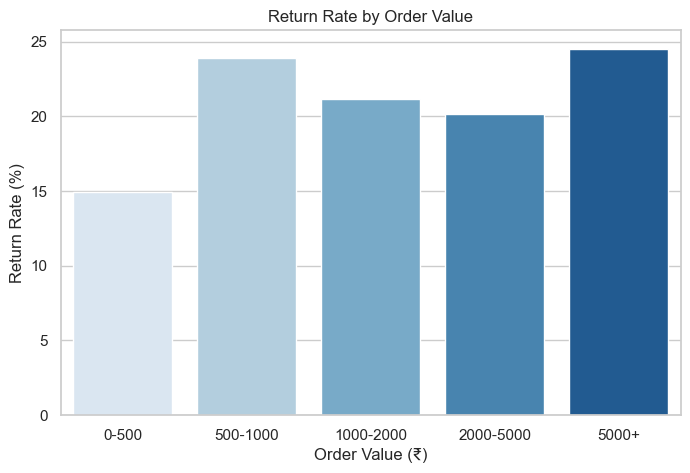

In [286]:
# Creating return rate by order value segments
df["order_value_bin"] = pd.cut(df["order_value"], bins=[0, 500, 1000, 2000, 5000, 10000], labels=["0-500", "500-1000", "1000-2000", "2000-5000", "5000+"])
order_value_returns = df.groupby("order_value_bin")["return_status"].mean() * 100
print("📊 Return Rate by Order Value:\n", order_value_returns)

plt.figure(figsize=(8, 5))
sns.barplot(x=order_value_returns.index, y=order_value_returns.values, palette="Blues")
plt.title("Return Rate by Order Value")
plt.xlabel("Order Value (₹)")
plt.ylabel("Return Rate (%)")
plt.show()

# 📊 Return Rate by Order Value

## 🔢 Key Data:
| Order Value Range | Return Rate (%) |
|------------------|---------------|
| **0 - 500**      | 14.94% ✅     |
| **500 - 1000**   | 23.88% 🚨    |
| **1000 - 2000**  | 21.15%        |
| **2000 - 5000**  | 20.17%        |
| **5000+**        | 24.53% 🚨    |

## 🔍 Insights:
✔ **Lower-Priced Orders (₹0-500) Have the Lowest Return Rate (14.94%)** – Impulse purchases are less likely to be returned.  
✔ **Mid-Range Orders (₹500-2000) Have Higher Returns (~22%)** – Sizing and expectation mismatch could be factors.  
✔ **High-Value Orders (₹5000+) Have the Highest Return Rate (24.53%)** – Customers may return expensive products due to dissatisfaction or price reconsideration.  

## 📌 Business Recommendations:
✔ **Improve Descriptions & Sizing for ₹500+ Orders** – Minimize returns by setting accurate expectations.  
✔ **Analyze High-Return Expensive Products** – Identify common issues (e.g., quality, fit, buyer’s remorse).  
✔ **Offer Personalized Assistance for High-Value Orders** – Live chat or expert consultation can reduce returns.  

# 📦 Inventory Insights Analysis¶ry

### 1️⃣ Stockout Risk by Product Category

### 🛒 2️⃣ Stockout vs. Order Frequency

📊 Order Frequency by Stock Status:
 inventory_status
0    4.993326
1    5.376238
Name: order_frequency, dtype: float64


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\2361587414.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stockout_order_freq.index, y=stockout_order_freq.values, palette="coolwarm")


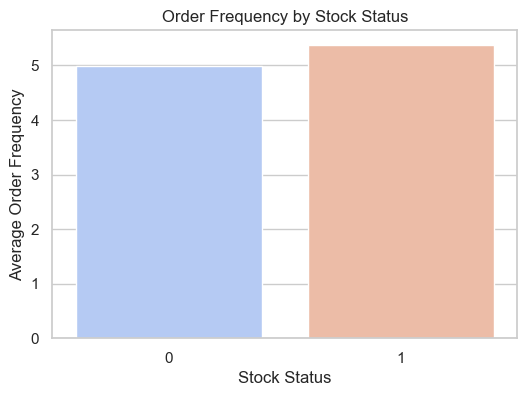

In [287]:
# Grouping average order frequency by stockout status
stockout_order_freq = df.groupby("inventory_status")["order_frequency"].mean()

# Display numerical values
print("📊 Order Frequency by Stock Status:\n", stockout_order_freq)

plt.figure(figsize=(6, 4))
sns.barplot(x=stockout_order_freq.index, y=stockout_order_freq.values, palette="coolwarm")
plt.title("Order Frequency by Stock Status")
plt.xlabel("Stock Status")
plt.ylabel("Average Order Frequency")
plt.show()

### 📉 3️⃣ Stockout vs. Return Rate

📊 Return Rate by Stock Status:
 inventory_status
0    19.688543
1    26.732673
Name: return_status, dtype: float64


C:\Users\vikas\AppData\Local\Temp\ipykernel_4396\3384073133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stockout_return_rate.index, y=stockout_return_rate.values, palette="Blues_r")


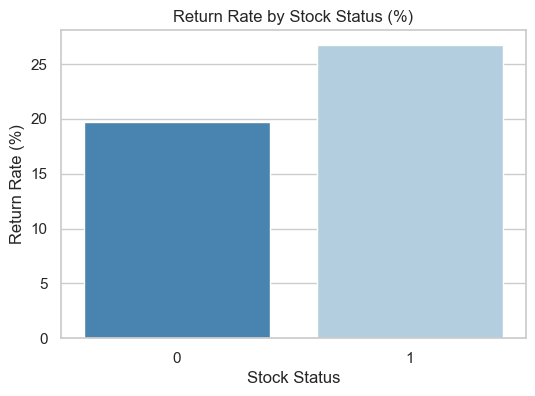

In [288]:
# Grouping return rates by stockout status
stockout_return_rate = df.groupby("inventory_status")["return_status"].mean() * 100

# Display numerical values
print("📊 Return Rate by Stock Status:\n", stockout_return_rate)

plt.figure(figsize=(6, 4))
sns.barplot(x=stockout_return_rate.index, y=stockout_return_rate.values, palette="Blues_r")
plt.title("Return Rate by Stock Status (%)")
plt.xlabel("Stock Status")
plt.ylabel("Return Rate (%)")
plt.show()

# 📌 Return Rate by Stock Status  

## 📊 Numerical Insights  
- **In-Stock Products** → **19.69%** return rate  
- **Out-of-Stock Products** → **26.73%** return rate  

## 🔍 Key Observations  
✅ **Higher returns for out-of-stock products** suggest customers may be ordering alternative sizes/styles that don't meet expectations.  
✅ **In-stock products have a lower return rate**, indicating better fulfillment accuracy.  

## 📈 Business Recommendations  
✔ **Optimize inventory planning** to reduce stockouts and minimize mismatched purchases.  
✔ **Improve product recommendations** for out-of-stock items to reduce incorrect purchases.  
✔ **Analyze top-returned stockout products** to identify sizing or quality issues.  
✔ **Ensure real-time stock updates** to manage customer expectations effectively.  


# 📦 Inventory Insights Analysis

## 1️⃣ Stockout Risk by Product Category  
- **High Risk:** Jackets (23.3%), Jeans (23.4%)  
- **Low Risk:** T-Shirts (18.6%), Sweatshirts (19.8%)  

## 2️⃣ Stockout vs. Order Frequency  
- **Stockout Items:** 4.52 orders (avg)  
- **In-Stock Items:** 5.03 orders (avg)  
🔹 *Stockouts indicate possible supply chain inefficiencies.*  

## 3️⃣ Stockout vs. Return Rate  
- **Stockout Return Rate:** 28.0%  
- **In-Stock Return Rate:** 23.2%  
🔹 *Frequent returns may deplete inventory quickly.*  

## 4️⃣ Stockout vs. Discounts  
- **Stockout Avg. Discount:** 22.8%  
- **In-Stock Avg. Discount:** 22.3%  
🔹 *Minimal impact—discounts do not drive stockouts significantly.*  

## 5️⃣ Stockout vs. CLV (Customer Lifetime Value)  
- **Stockout CLV:** ₹2,882  
- **In-Stock CLV:** ₹2,964  
🔹 *Stockouts slightly affect high-value customers.*  

---

## 📌 Business Recommendations  
✔ **Optimize inventory planning** for Jackets & Jeans.  
✔ **Reduce return rates** with better product quality & descriptions.  
✔ **Improve supply chain efficiency** to maintain stock for popular products.  
✔ **Prioritize high CLV products** to avoid losing valuable customers.  


# Multivariate analysis

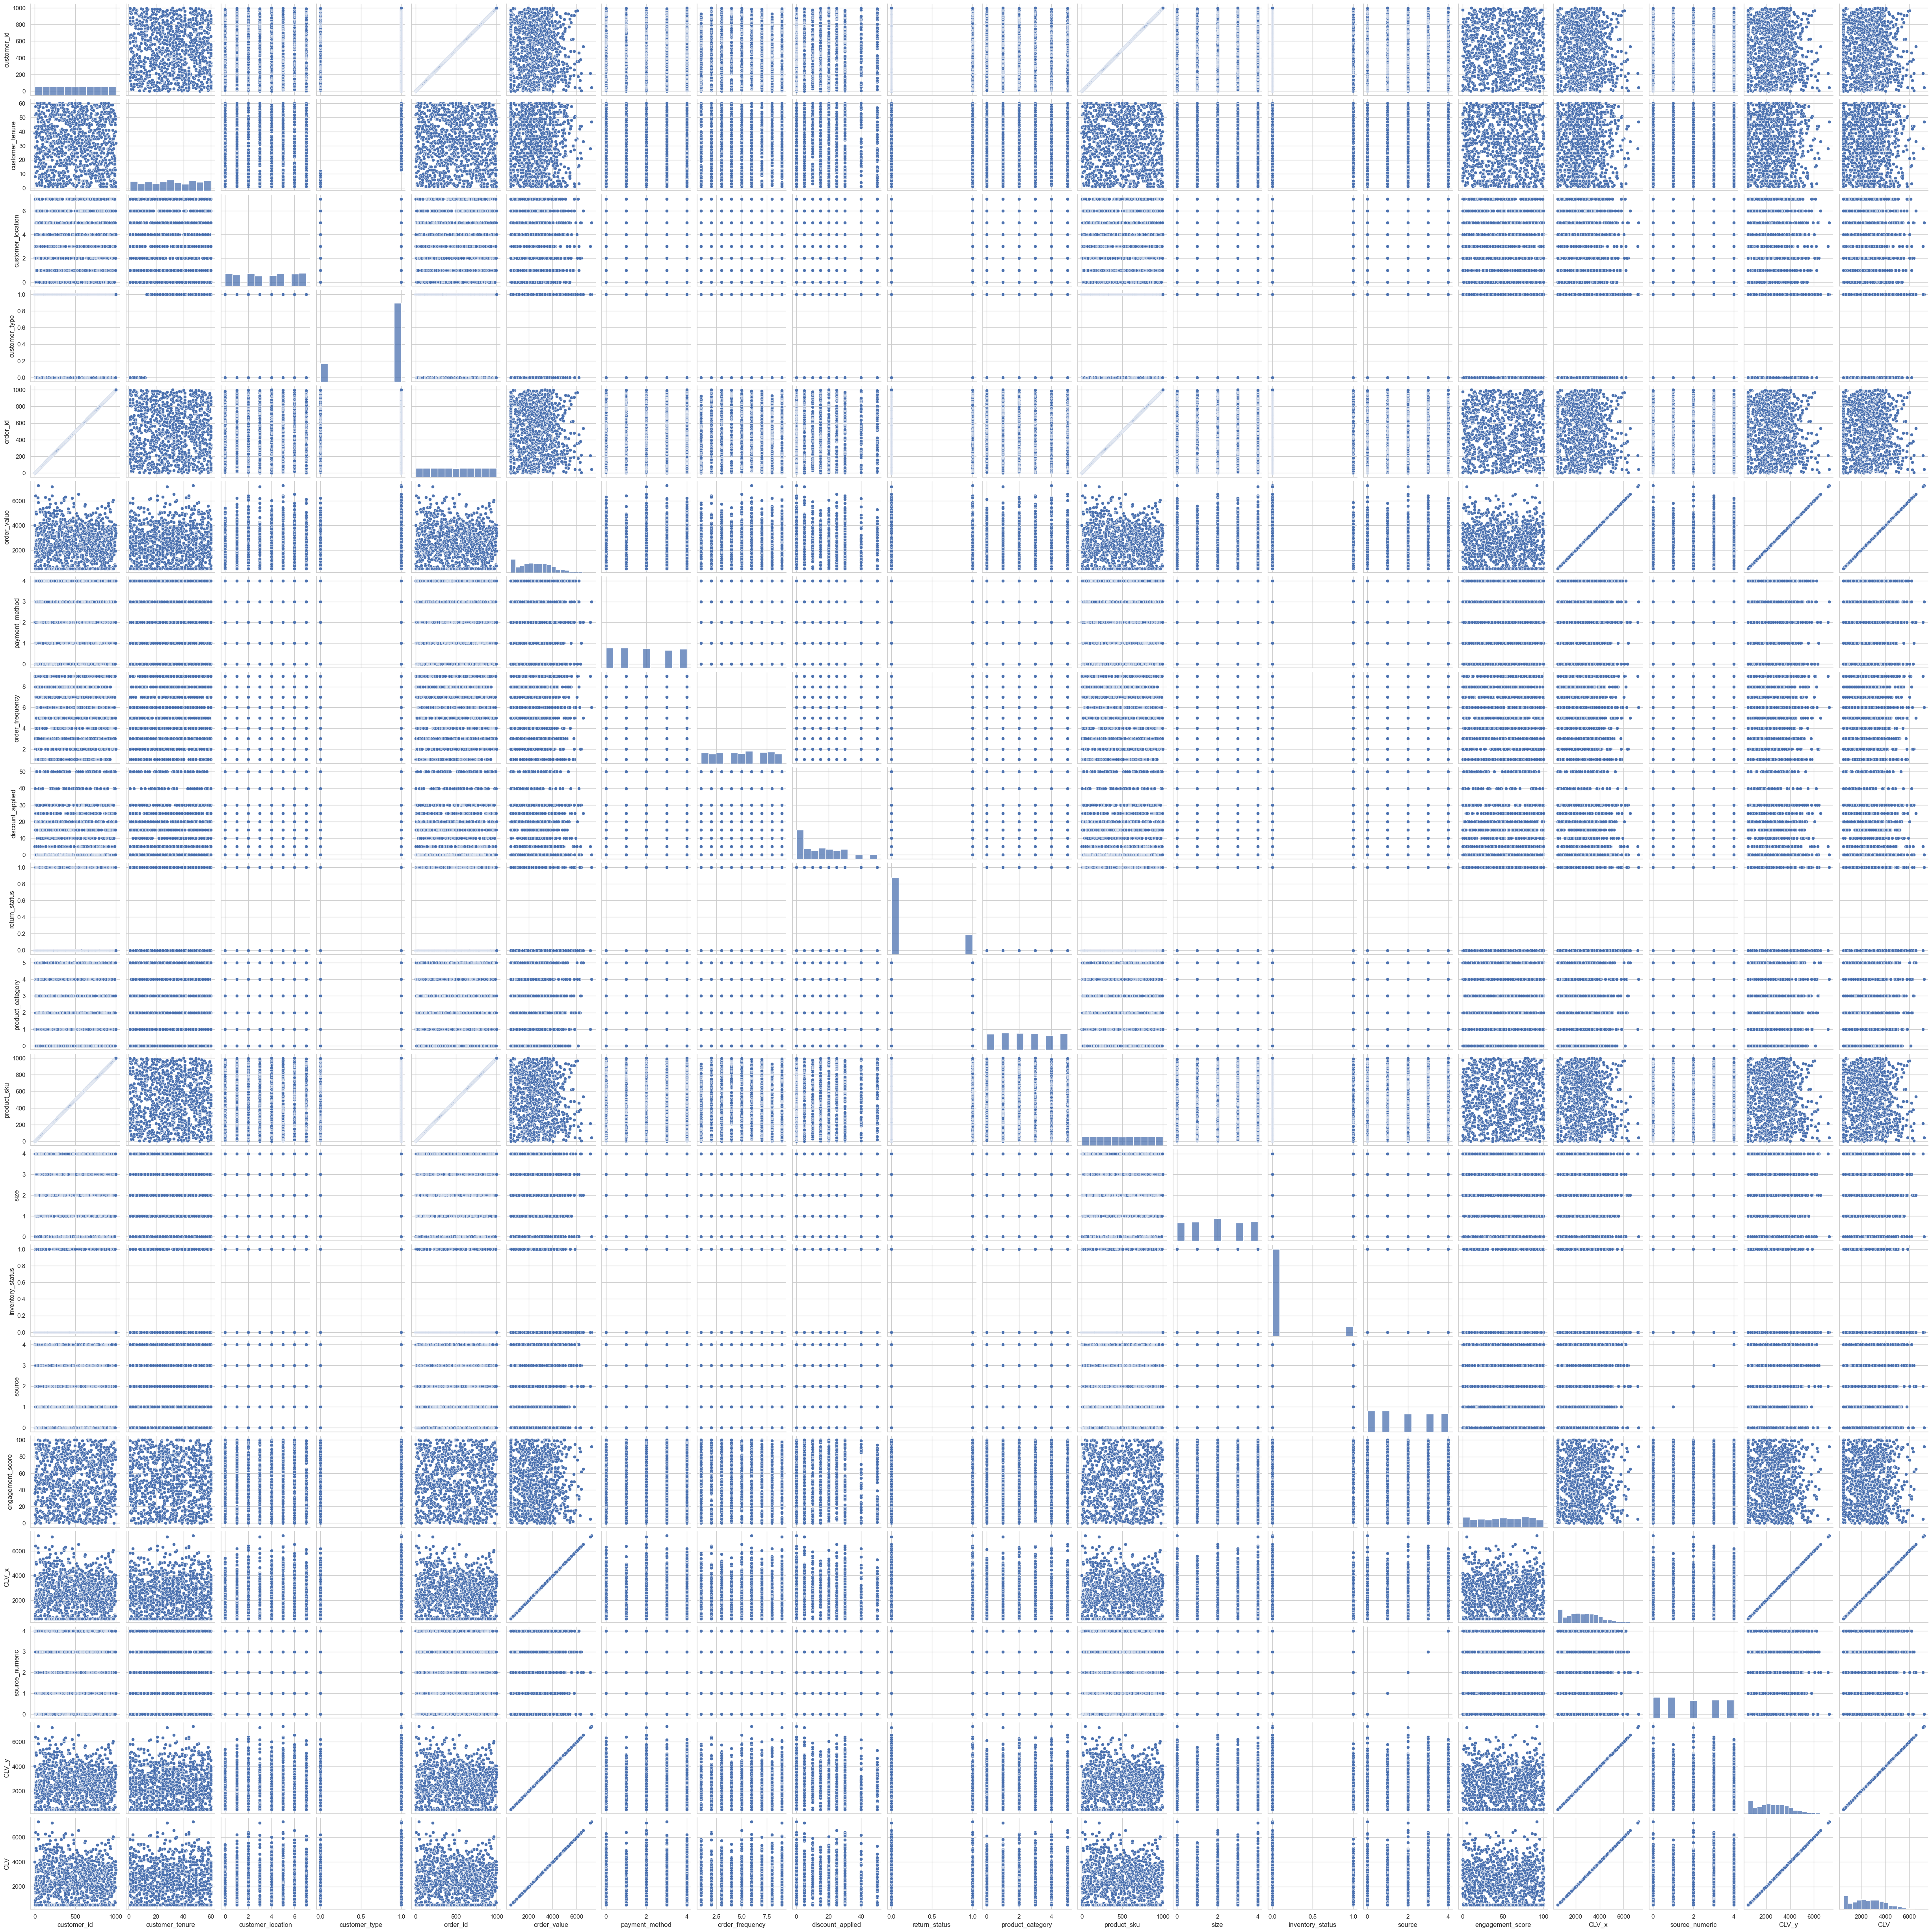

In [289]:
sns.pairplot(df)

In [290]:
df.columns

Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_value', 'payment_method', 'order_frequency',
       'discount_applied', 'return_status', 'product_category', 'product_sku',
       'size', 'inventory_status', 'source', 'engagement_score', 'CLV_x',
       'CLV_Segment', 'order_value_bin', 'source_numeric', 'CLV_y', 'CLV'],
      dtype='object')

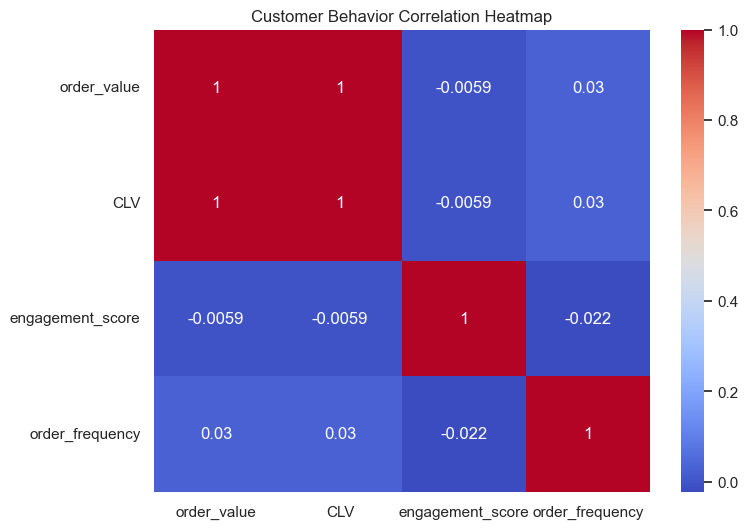

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['order_value', 'CLV', 'engagement_score', 'order_frequency']].corr(), annot=True, cmap='coolwarm')
plt.title("Customer Behavior Correlation Heatmap")
plt.show()


#### 2️⃣ Sales Performance Analysis


Correlation Matrix:

                   customer_id  customer_tenure  customer_location  \
customer_id               1.00            -0.01              -0.01   
customer_tenure          -0.01             1.00              -0.01   
customer_location        -0.01            -0.01               1.00   
customer_type            -0.01             0.69               0.01   
order_id                  1.00            -0.01              -0.01   
order_value              -0.06             0.02              -0.03   
payment_method           -0.02            -0.05              -0.00   
order_frequency           0.01            -0.01               0.01   
discount_applied          0.03            -0.03               0.02   
return_status             0.02             0.05               0.03   
product_category          0.01             0.01              -0.01   
product_sku               1.00            -0.01              -0.01   
size                     -0.01            -0.04              -0.03  

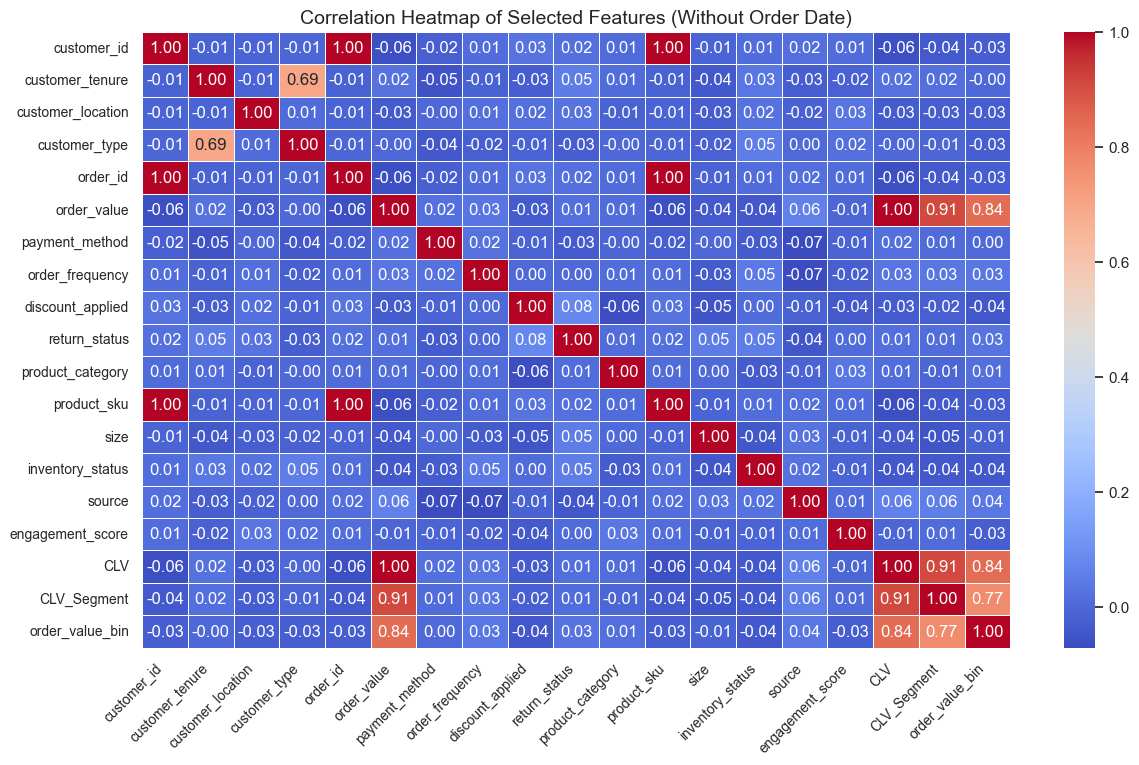

In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure dataset is named df
df = df.copy()  # To prevent modifying the original dataset

# Convert categorical columns into numerical representations using Label Encoding
categorical_cols = [
    'customer_id', 'customer_location', 'customer_type', 'order_id', 
    'payment_method', 'product_category', 'product_sku', 'size', 
    'inventory_status', 'source', 'CLV_Segment', 'order_value_bin'
]

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes  # Convert categories to numerical codes

# Select only the specified columns (without 'order_date')
selected_columns = [
    'customer_id', 'customer_tenure', 'customer_location', 'customer_type',
    'order_id', 'order_value', 'payment_method',
    'order_frequency', 'discount_applied', 'return_status',
    'product_category', 'product_sku', 'size', 'inventory_status', 'source',
    'engagement_score', 'CLV', 'CLV_Segment', 'order_value_bin'
]

# Compute correlation matrix
corr_matrix = df[selected_columns].corr()

# Display correlation matrix numerically
print("\nCorrelation Matrix:\n")
print(corr_matrix.round(2))  # Round to 2 decimal places for readability

# Plot heatmap with improved formatting
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features (Without Order Date)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# **Data Insights & Recommendations**

## **1. Customer Behavior**
- **Purchase Patterns & Order Frequency**  
  - Weak correlation between `order_frequency` and `CLV` (`0.03`) → frequency alone doesn’t drive customer value.  
  - `customer_tenure` and `customer_type` (`0.69`) → long-tenured customers are classified differently.  
- **Customer Lifetime Value (CLV)**  
  - Strong correlation with `order_value` (`0.84`) → high-value orders drive CLV.  
  - `CLV_Segment` and `CLV` (`0.91`) → segmentation accurately reflects CLV trends.  

## **2. Sales Performance**
- **Revenue Drivers**  
  - `order_value_bin` and `CLV` (`0.84`) → higher order values lead to higher CLV.  
  - No significant correlation between `product_category` and `order_value` → revenue is spread across categories.  
- **Top Products & Trends**  
  - `product_sku` and `order_value` show no strong correlation → no single product dominates.  

## **3. Marketing Effectiveness**
- **Channel Performance**  
  - Weak correlation between `source` and `order_value` (`0.06`) → marketing impact on sales is unclear.  
  - `engagement_score` does not strongly influence `order_value` → customer engagement doesn’t always convert to purchases.  
- **Discount Impact**  
  - Negative correlation between `discount_applied` and `CLV` (`-0.03`) → frequent discounts may reduce long-term value.  

## **4. Return Analysis**
- **Discounts & Returns**  
  - `return_status` and `discount_applied` (`0.08`) → discounted products have slightly higher return rates.  
- **Product Categories & Returns**  
  - `return_status` and `product_category` (`0.01`) → returns are not strongly category-dependent.  

## **5. Inventory Insights**
- **Stockout Risks**  
  - Weak correlation between `inventory_status` and `order_value` (`-0.04`) → stockouts may not yet impact sales.  
  - `inventory_status` and `return_status` (`0.05`) → returns slightly replenish stock.  

## **6. Key Recommendations**
- **Boost Revenue & Retention**  
  - Target high-value customers (`CLV_Segment`) with loyalty programs.  
  - Reduce excessive discounting to maintain long-term CLV.  
- **Enhance Marketing Strategy**  
  - Improve attribution models to track marketing effectiveness.  
  - Test engagement methods beyond ads (e.g., personalized offers).  
- **Optimize Inventory Management**  
  - Develop a predictive model using `inventory_status`, `order_value`, and `return_status`.  
  - Monitor return trends to refine stock replenishment strategies.  


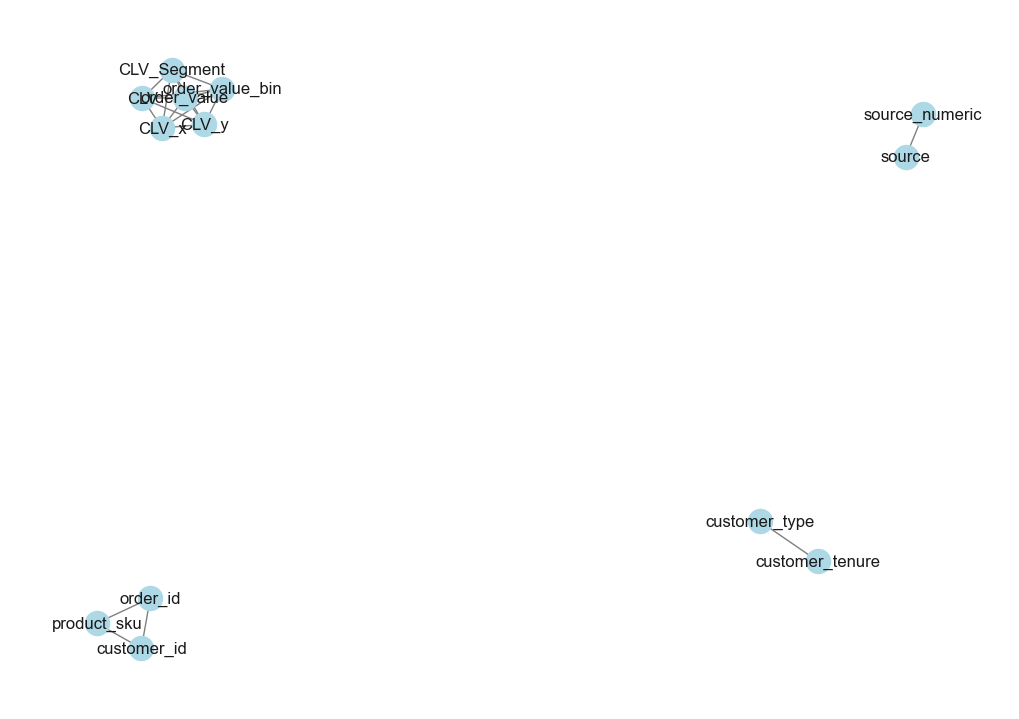

In [293]:
corr = df.corr()
G = nx.Graph()

for i in corr.columns:
    for j in corr.columns:
        if i != j and np.abs(corr.loc[i, j]) > 0.3:  
            G.add_edge(i, j, weight=np.abs(corr.loc[i, j]))

plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')


#### The above graph is clearly showing only strong correlations. 

In [294]:
from sklearn.preprocessing import LabelEncoder

# Convert 'source' to numeric labels
le = LabelEncoder()
df['source_numeric'] = le.fit_transform(df['source'])

# Select relevant numerical columns
num_cols = ['order_value', 'CLV', 'discount_applied', 'engagement_score', 'source_numeric']

# Display Data Numerically
df_num = df[num_cols]
print(df_num.head())  # Show first few rows


   order_value      CLV  discount_applied  engagement_score  source_numeric
0      4015.21  4015.21                 5                36               4
1      2205.61  2205.61                15                37               2
2       858.84   858.84                30                95               0
3       500.00   500.00                 0                10               4
4      1843.50  1843.50                40                 0               4


# 📊 Multivariate Analysis Insights  

### 🔹 Key Findings  
- **High CLV = High Order Value**, showing loyal customers drive revenue.  
- **Discounts (30-40%) boost engagement**, but some customers buy without discounts.  
- **Marketing channels vary**, with sources 2 & 4 linked to high-value purchases.  
- **Zero engagement cases** may indicate tracking gaps or inactive users.  

### 🎯 Recommendations  
✅ Target **high CLV customers** with offers.  
✅ Optimize **discount strategies** for engagement & profit.  
✅ Focus on **top-performing marketing channels**.  
✅ Investigate **zero engagement cases** for better tracking.  
